# Macro III - Problem Set 01

Vinícius de Almeida Nery Ferreira

August 21th, 2024

In [1]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# Setting seed for random
random.seed(121019)

## Question 1 - Solving Nonlinear Equations - Bisection Method

### (a) Analytical steady-state capital per worker

In the standard Solow economic growth model, the steady-state capital per worker solves

$$sf(k) = (n + g + \delta)k,$$

with $f(k) = k^\alpha$.
Dividing both sides by $k$, we get

$$s k^{\alpha - 1} = (n + g + \delta) \quad \therefore \quad k = \left(\frac{s}{n + g + \delta} \right)^{\frac{1}{1 - \alpha}}$$

Let $s = 0.3$, $\alpha = 0.3$, $n = 0.01$, $g = 0.02$ and $\delta = 0.05$.
The analytical solution is given by:

In [2]:
# Defining parameters
s = 0.3
alpha = 0.3
n = 0.01
g = 0.02
delta = 0.05

In [3]:
# Calculating steady-state capital
analytical_k = (s / (n + g + delta))**(1/(1 - alpha))
print(f"The steady-state capital is {round(analytical_k, 3)}.")

The steady-state capital is 6.608.
The steady-state capital is 6.608.


### (b) Bisection Method

In the Solow growth model, we know that there can't be dynamic inefficiency, so we know that the steady-state capital is never higher than the one implied by the golden rule.

In the steady-state, investment is just enough to replenish the depreciated capital (so that $\hat{k} = 0$). Then,

$$c = f(k) - \delta k = k^\alpha - \delta k$$

To maximize it, we take the FOC (as $f(k)$ is concave) with respect to $k$:

$$0 = \alpha k^{\alpha - 1} - \delta \quad \therefore \quad k_{GR} = \left(\frac{\alpha}{\delta} \right)^{\frac{1}{1 - \alpha}}$$

In [4]:
# Computing analytical golden rule capital
analytical_k_gr = (alpha / delta)**(1/(1 - alpha))
print(f"Golden Rule Capital: {round(analytical_k_gr, 3)}.")

Golden Rule Capital: 12.931.
Golden Rule Capital: 12.931.


Thus, our initial interval will be $[0.01, k_{gr}]$, as we need that the function evaluated at the lower bound be negative so that the Intermediate Value Theorem holds. 

We will now implement the bisection method, first defining a function then applying the method.

*NOTE: it goes without saying that ChatGPT helped with some of the code in this exercise, mainly translating the in-class codes from Matlab to Python.*

In [5]:
def bisection_method(func, a, b, tol=0.00001, max_iter=10**4):
    """
    Implements the bisection method for a function func on a interval [a, b]
    """

    # Calculate the function values at the bounds
    fa = func(a)
    fb = func(b)

    # Check the Intermediate Value Theorem condition
    if fa * fb > 0:
        return 'Wrong choice for a and b'

    # Start the bisection process
    num_iterations = 0
    c = (a + b) / 2
    err = abs(func(c))

    # For fun, I will get each iteration of c to plot after
    k_guesses_vector = [c]
    
    # Iterating while we have not yet converged or reached the maximum number of iterations
    while (err > tol) and (num_iterations < max_iter):
        if func(c) > 0:
            b = c
        elif func(c) < 0:
            a = c
        
        # Average point
        c = (a + b) / 2

        # Checking "error", i.e., difference toward f(x) = 0 (recall we want a root)
        err = abs(func(c))
        k_guesses_vector.append(c)
        num_iterations += 1

    # Return the root, number of iterations and the "convergence path"
    return c, num_iterations, k_guesses_vector

In [6]:
# Equation to find the root of the steady state capital
def steady_state_k(k, s=s, alpha=alpha, n=n, g=g, delta=delta):
    return s * (k**alpha) - (n + g + delta) * k

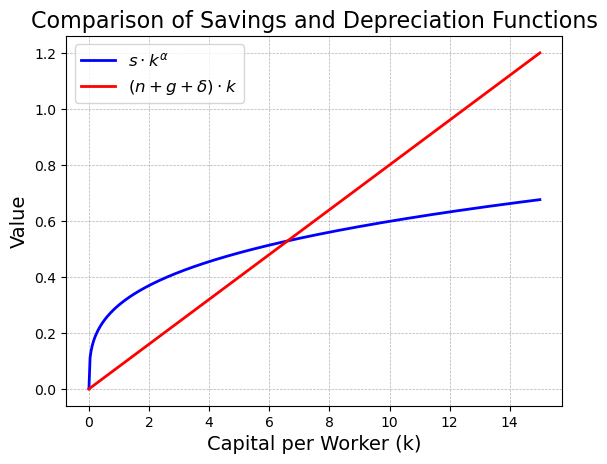

In [7]:
# Plotting functions
## Functions
def savings_curve(k, s, alpha):
    return s * (k ** alpha)

def depreciation_curve(k, n, g, delta):
    return (n + g + delta) * k

## Generate values for k over the interval [0, 15]
k_values = np.linspace(0, 15, 400)
savings_values = savings_curve(k_values, s, alpha)
depreciation_values = depreciation_curve(k_values, n, g, delta)

## Plotting
plt.figure()
plt.plot(k_values, savings_values, label=r'$s \cdot k^\alpha$', color='blue', lw=2)
plt.plot(k_values, depreciation_values, label=r'$(n + g + \delta) \cdot k$', color='red', lw=2)

## Title and labels
plt.title('Comparison of Savings and Depreciation Functions', fontsize=16)
plt.xlabel('Capital per Worker (k)', fontsize=14)
plt.ylabel('Value', fontsize=14)

## Adding grid, legend, and axis lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

## Show plot
plt.show()

The function we want (the difference between the blue and red curves) satisfies the Intermediate Value Theorem condition.

We can then use the bisection method:

In [8]:
# Implementing
# Because the function of the steady state capital is decreasing in k (see graph), we invert the interval
numerical_k, num_iterations_bisection, k_guesses = bisection_method(
    steady_state_k, 
    analytical_k_gr, 0.01,
    tol=10 ** (-4)
)

# Printing
print(f"Numerical solution: {round(numerical_k, 3)}.")
print(f"Analytical solution: {round(analytical_k,3)}.")
print(f"Absolute Error: {round(abs(analytical_k - numerical_k), 3)}.")
print(f"Number of iterations: {num_iterations_bisection}.")

Numerical solution: 6.606.
Analytical solution: 6.608.
Absolute Error: 0.001.
Number of iterations: 11.
Numerical solution: 6.606.
Analytical solution: 6.608.
Absolute Error: 0.001.
Number of iterations: 11.


### (c) Comparing the numerical and the analytical solutions

We see that in a small number of iterations (11), the numerical solution converges to a tolerance level of 0.0001 (when avaliated at the steady state function). Up to two decimal places, they are the same.

The relative error is given by

In [9]:
print(f"Relative Error: {round(100*abs(analytical_k - numerical_k) / analytical_k, 3)}%.")

Relative Error: 0.019%.
Relative Error: 0.019%.


As a bonus, we plot the "convergence path" below:

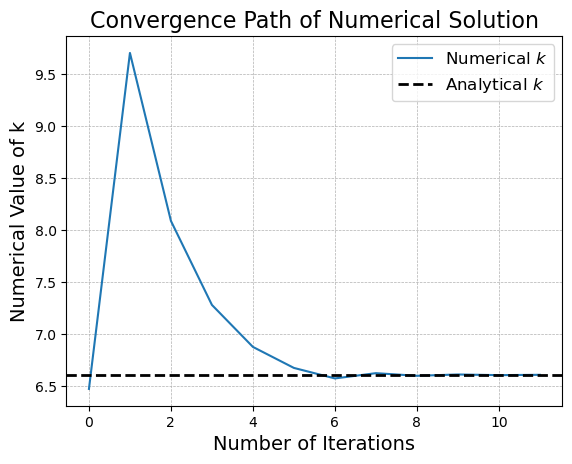

In [10]:
## Generate values for k over the interval [0, 15]
k_values = np.linspace(0, 15, 400)
savings_values = savings_curve(k_values, s, alpha)
depreciation_values = depreciation_curve(k_values, n, g, delta)

## Plotting
plt.figure()
plt.plot(k_guesses, label=r'Numerical $k$')
plt.axhline(y=analytical_k, color='black', linestyle='--', linewidth=2, label=r'Analytical $k$')

## Title and labels
plt.title('Convergence Path of Numerical Solution', fontsize=16)
plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Numerical Value of k', fontsize=14)

## Adding grid, legend, and axis lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

## Show plot
plt.show()

### (d) Robustness of the Bisection Method

We alter the savings rate and print all results below.

In [11]:
# Defining the values of s
s_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Looping across and printing the solution
for s_value in s_values:
    print(f"\nRESULTS FOR s = {s_value}:")

    # Calculating analytical solution (golden rule does not depend on s)
    analytical_k_robustness = (s_value / (n + g + delta))**(1/(1 - alpha))

    # Equation to find the root of the steady state capital
    def steady_state_k_robustness(k, s=s_value, alpha=alpha, n=n, g=g, delta=delta):
        return s * (k**alpha) - (n + g + delta) * k

    # Implementing
    try:
        # Function
        numerical_k_robustness, num_iter_robustness, k_guesses_robustness = bisection_method(
            steady_state_k_robustness, 
            analytical_k_gr, 0.01,
            tol=0.0001
        )

        # Results
        print(f"Numerical solution: {round(numerical_k_robustness, 4)}.")
        print(f"Analytical solution: {round(analytical_k_robustness, 4)}.")
        print(f"Relative Error: {round(100*abs(analytical_k_robustness - numerical_k_robustness) / analytical_k_robustness, 3)}%.")
        print(f"Number of iterations: {num_iter_robustness}.")

    except ValueError:
        print(f"Steady-state capital for s = {s_value} ({round(analytical_k_robustness, 2)}) out of interval [0, {round(analytical_k_gr, 2)}].")


RESULTS FOR s = 0.1:
Numerical solution: 1.376.
Analytical solution: 1.3754.
Relative Error: 0.037%.
Number of iterations: 11.

RESULTS FOR s = 0.2:
Numerical solution: 3.7009.
Analytical solution: 3.7024.
Relative Error: 0.041%.
Number of iterations: 10.

RESULTS FOR s = 0.3:
Numerical solution: 6.6063.
Analytical solution: 6.6076.
Relative Error: 0.019%.
Number of iterations: 11.

RESULTS FOR s = 0.4:
Numerical solution: 9.966.
Analytical solution: 9.9662.
Relative Error: 0.002%.
Number of iterations: 9.

RESULTS FOR s = 0.5:
Steady-state capital for s = 0.5 (13.71) out of interval [0, 12.93].


RESULTS FOR s = 0.1:
Numerical solution: 1.376.
Analytical solution: 1.3754.
Relative Error: 0.037%.
Number of iterations: 11.

RESULTS FOR s = 0.2:
Numerical solution: 3.7009.
Analytical solution: 3.7024.
Relative Error: 0.041%.
Number of iterations: 10.

RESULTS FOR s = 0.3:
Numerical solution: 6.6063.
Analytical solution: 6.6076.
Relative Error: 0.019%.
Number of iterations: 11.

RESULTS 

We see that, for $s \in \{0.1, 0.2, 0.3, 0.4\}$, the function behaves as expected, with the relative error not surpassing 0.05\% of the analytical solution. The number of iterations in each of these cases is also similar.

However, we have a problem for $s = 0.5$. This is because the analytical solution falls out of the specified interval, which highlights the disavantadge of getting the initial interval right. 

If we fix this, we get similar results to the other values. Therefore, apart from the issue of the interval, the bisection method provides robust convergence results.

In [12]:
numerical_k_s5, num_iter_s5, k_guesses_s5 = bisection_method(
    steady_state_k_robustness, 
    20, 0.01,
    tol=0.0001
)

# Results
print(f"Numerical solution: {round(numerical_k_s5, 3)}.")
print(f"Analytical solution: {round(analytical_k_robustness, 3)}.")
print(f"Relative Error: {round(100*abs(analytical_k_robustness - numerical_k_s5) / analytical_k_robustness, 3)}%.")
print(f"Number of iterations: {num_iter_s5}.")

Numerical solution: 13.709.
Analytical solution: 13.708.
Relative Error: 0.009%.
Number of iterations: 11.
Numerical solution: 13.709.
Analytical solution: 13.708.
Relative Error: 0.009%.
Number of iterations: 11.


## Question 2 - Solving Nonlinear Equations - Newton’s Method in Optimal Control Problem with Non-linear Wage

Consider a profit maximizing firm, with profit given by

$$
\Pi_t = A_t l_t^\alpha - l_t w_t(l_t),
$$

where $A_t$ is the total factor productivity, and the wage rate is given by a non-linear function $w_t(l_t) = w_0e^{\eta l_t}$, where $w_0$ is the base wage and $\eta$ is the elasticity of the wage with respect to labor. 

The firm chooses lt to maximise its profits over time.

### (a) First-order condition and analytical solution

Assuming usual conditions hold, the FOC of the problem with respect to labor ($l_t$) is given by

$\frac{\partial \Pi_t}{\partial l_t} = 0 \quad \therefore \quad 0 = \alpha A_t l_t^{\alpha - 1} - w_0e^{\eta l_t} - l_t \eta w_0 e ^{\eta l_t}$,

which we are unable to derive an analytical solution for, as we have a linear combination of exponential functions where $l_t$ is in the exponent and an "independent" term ($\alpha A_t l_t^{\alpha - 1}$).

### (b) Newton-Raphson's method

In [13]:
# Defining parameters
A = 1
alpha = 0.4
w0 = 5
eta = 0.1

We will now define our function of interest. We want to find the root of the derivative (the FOC), so we will need to calculate the second order derivative.
This is given by:

$$\frac{\partial^2 \Pi_t}{\partial l_t^2} = 
\alpha (\alpha - 1) l_t^{\alpha - 2} - \eta w_0e^{\eta l_t} - \eta w_0 e ^{\eta l_t} - l_t \eta^2 w_0 e ^{\eta l_t}$$

Simplifying, we get

$$\frac{\partial^2 \Pi_t}{\partial l_t^2} = 
\alpha (\alpha - 1) l_t^{\alpha - 2} - w_0e^{\eta l_t} \left[2\eta + l_t \eta^2 \right]$$

In [14]:
# Defining function and partial derivative
def profit_function(labor, A=A, alpha=alpha, w0=w0, eta=eta):
    w = w0 * np.exp(eta * labor)
    return A * (labor**alpha) - labor * w

def profit_derivative(labor, A=A, alpha=alpha, w0=w0, eta=eta):
    return alpha * A * (labor **(alpha - 1)) - w0 * np.exp(eta * labor) - labor * eta * w0 * np.exp(eta * labor)

In [15]:
# Second order derivative
def profit_2nd_derivative(labor, A=A, alpha=alpha, w0=w0, eta=eta):
    term1 = alpha * (alpha - 1) * labor ** (alpha - 2)
    term2 = w0 * np.exp(eta * labor) * (2 * eta + labor * eta ** 2)
    return term1 - term2

We will now plot the profit function and its partial derivative with respect to $l_t$.

In [16]:
# Generate values for labor over the interval [0, 10]
labor_values = np.linspace(0.001, 0.2, 400)
profit_values = profit_function(labor_values)
profit_derivative_values = profit_derivative(labor_values)

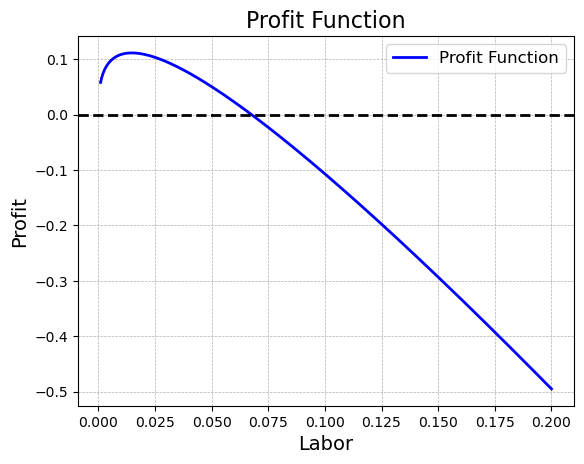

In [17]:
# Plotting the profit function
plt.figure()
plt.plot(labor_values, profit_values, label=r'Profit Function', color='blue', lw=2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)

# Title and labels
plt.title('Profit Function', fontsize=16)
plt.xlabel('Labor', fontsize=14)
plt.ylabel('Profit', fontsize=14)

# Adding grid, legend, and axis lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

# Set x-axis labels to appear every one unit
# plt.xticks(range(int(min(labor_values)), int(max(labor_values)) + 1))

# Show plot
plt.show()

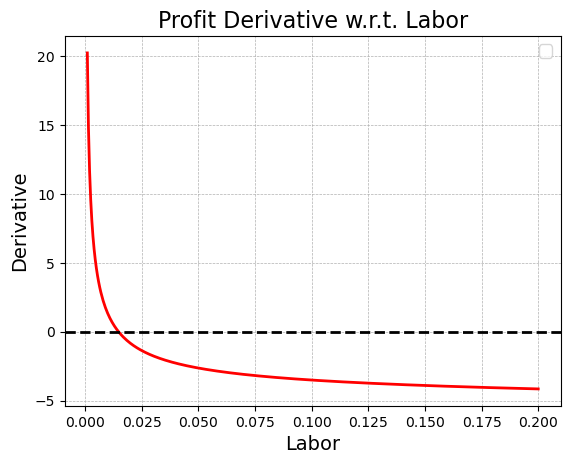

In [18]:
# Plotting the derivative
plt.figure()
plt.plot(labor_values, profit_derivative_values, color='red', lw=2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)

# Title and labels
plt.title('Profit Derivative w.r.t. Labor', fontsize=16)
plt.xlabel('Labor', fontsize=14)
plt.ylabel('Derivative', fontsize=14)

# Adding grid, legend, and axis lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

# Set x-axis labels to appear every one unit
# plt.xticks(range(int(min(labor_values)), int(max(labor_values)) + 1))

# Show plot
plt.show()

We will now define the newton method function and use it to calculate the optimal value of labor.

In [19]:
# Creating function
def newton_method(func, derivative, x0, tol=0.0001, max_iter=1000):
    """
    Program to solve a equation using Newton's method.
    
    Parameters:
        func - Function that returns the equation we are trying to find the root of
        derivative - Function that has the FOC (derivative) of the equation of interest
        x0 - Initial guess for the solution
        tol - Convergence criterion (tolerance)
        max_iter - Maximum number of iterations
    
    Returns:
        x - Solution to the system of equations
    """

    # Iterating
    for num_iter in range(max_iter):
        # Calculating function and derivatives
        f_value = func(x0)
        derivative_value = derivative(x0)

        # Checking root of the linear approximation at x0
        ## 0 = f_value + (x - x0) * derivative_value
        x = x0 - f_value / derivative_value
        
        # Checking tolerance: if the new iteration x and the previous iteration x0
        # are too close, we have our root, since our linear approximation of the function
        # at x0 yields a root which is close to the previous iteration (see Lec2 Slide 27)

        # Alternatively, we could just check f(x) and see if its close to 0, which is the same
        # as x ≈ x0 from the above expression of the linear approximation of x
        if abs(x - x0) < tol:
            break
        
        # Defining new value and starting again if necessary
        x0 = x
    
    if num_iter >= max_iter:
        print(f'WARNING: Maximum number of {max_iter} iterations reached')
    
    return x, num_iter

In [20]:
# From the graphs, the initial guess will be 0.0001
initial_guess = 0.0001

# Function
optimal_labor, num_iter_newton = newton_method(
    func=profit_derivative, derivative=profit_2nd_derivative, x0=initial_guess
)

# Printing results
print(f"Profit-maximizing value of labor: {round(optimal_labor, 6)}.")
print(f"Number of iterations: {num_iter_newton}.")

Profit-maximizing value of labor: 0.01478.
Number of iterations: 8.
Profit-maximizing value of labor: 0.01478.
Number of iterations: 8.


Our number of iterations is very small (because we did our graphical analysis). We will retry with different initial guesses.

In [21]:
for i in range(0, 5):
    # Sample a random number from a uniform distribution [0, 0.2]
    random_guess = random.uniform(0, 0.2)

    # Calculating number of iterations
    optimal_labor_rb, num_iter_newton_rb = newton_method(
        func=profit_derivative, derivative=profit_2nd_derivative, x0=random_guess
    )

    print(f"Initial guess: {round(random_guess, 2)}.")
    print(f"Number of iterations: {num_iter_newton_rb}.\n")


Initial guess: 0.09.
Number of iterations: 999.

Initial guess: 0.14.
Number of iterations: 999.

Initial guess: 0.08.
Number of iterations: 999.

Initial guess: 0.03.
Number of iterations: 4.

Initial guess: 0.19.
Number of iterations: 999.

Initial guess: 0.09.
Number of iterations: 999.

Initial guess: 0.14.
Number of iterations: 999.

Initial guess: 0.08.
Number of iterations: 999.

Initial guess: 0.03.
Number of iterations: 4.

Initial guess: 0.19.
Number of iterations: 999.



<positron-console-cell-21>:7: RuntimeWarning: invalid value encountered in scalar power
<positron-console-cell-21>:3: RuntimeWarning: invalid value encountered in scalar power


In this specific context, the method has difficulties due to the scale of the solutions, which are very small.

Thus, for bigger initial guesses, we are unable to find the solution, which highlights the importance of some graphical or analytical analysis before blindingly coding things.

### (c) Sensitivity analysis

We will do a *ceteris paribus* analysis, only changing one parameter at a time.

In [22]:
# Our initial guess will always be 0.0001 (same as before)
initial_guess_sensitivity = 0.0001

#### Productivity of Labour ($\alpha$)

In [23]:
# Sampling from a uniform (0, 1) 5 times
for i in range(0, 5):
    # Sampling
    alpha_sensitivity = round(random.uniform(0, 1), 2)
    print(f"\nAlpha = {alpha_sensitivity}")

    # Redefining functions (it would probably be better to pass **kwargs, but sunk cost now)
    # _sens = from sensitivity analysis
    def profit_derivative_sens(labor, A=A, alpha=alpha_sensitivity, w0=w0, eta=eta):
        term1 = alpha * A * labor **(alpha - 1)
        term2 = w0 * np.exp(eta * labor) + labor * eta * w0 * np.exp(eta * labor)
        return term1 - term2

    def profit_2nd_derivative_sens(labor, A=A, alpha=alpha_sensitivity, w0=w0, eta=eta):
        term1 = alpha * (alpha - 1) * labor ** (alpha - 2)
        term2 = w0 * np.exp(eta * labor) * (2 * eta + labor * eta ** 2)
        return term1 - term2

    optimal_labor_sens, num_iter_newton_sens = newton_method(
        func=profit_derivative_sens, derivative=profit_2nd_derivative_sens, 
        x0=initial_guess_sensitivity
    )
    
    print(f"Profit-maximizing value of labor: {round(optimal_labor_sens, 4)}.")
    print(f"Number of iterations: {num_iter_newton_sens}.")


Alpha = 0.14
Profit-maximizing value of labor: 0.0156.
Number of iterations: 9.

Alpha = 1.0
Profit-maximizing value of labor: -6.2598.
Number of iterations: 4.

Alpha = 0.31
Profit-maximizing value of labor: 0.0177.
Number of iterations: 9.

Alpha = 0.29
Profit-maximizing value of labor: 0.018.
Number of iterations: 9.

Alpha = 0.62
Profit-maximizing value of labor: 0.0041.
Number of iterations: 6.


Alpha = 0.14
Profit-maximizing value of labor: 0.0156.
Number of iterations: 9.

Alpha = 1.0
Profit-maximizing value of labor: -6.2598.
Number of iterations: 4.

Alpha = 0.31
Profit-maximizing value of labor: 0.0177.
Number of iterations: 9.

Alpha = 0.29
Profit-maximizing value of labor: 0.018.
Number of iterations: 9.

Alpha = 0.62
Profit-maximizing value of labor: 0.0041.
Number of iterations: 6.


We expect that higher values of $\alpha$ lead to bigger values of $l_t^*$, as $\alpha$ is a parameter for labour productivity. 
This would be true if our optimal labor demand were greater than 1, which is not the case.

Thus, higher values of $\alpha$ lead to lower values of $l_t^*$ when it is lower than 1.

#### Total Factor Productivity ($A_t$)

In [24]:
# Sampling from a uniform (0.5, 2) 5 times
for i in range(0, 5):
    # Sampling
    A_sensitivity = round(random.uniform(0.5, 2), 2)
    print(f"\nA = {A_sensitivity}")

    # Redefining functions (it would probably be better to pass **kwargs, but sunk cost now)
    # _sens = from sensitivity analysis
    def profit_derivative_sens(labor, A=A_sensitivity, alpha=alpha, w0=w0, eta=eta):
        term1 = alpha * A * labor **(alpha - 1)
        term2 = w0 * np.exp(eta * labor) + labor * eta * w0 * np.exp(eta * labor)
        return term1 - term2

    def profit_2nd_derivative_sens(labor, A=A_sensitivity, alpha=alpha, w0=w0, eta=eta):
        term1 = alpha * (alpha - 1) * labor ** (alpha - 2)
        term2 = w0 * np.exp(eta * labor) * (2 * eta + labor * eta ** 2)
        return term1 - term2

    optimal_labor_sens, num_iter_newton_sens = newton_method(
        func=profit_derivative_sens, derivative=profit_2nd_derivative_sens, 
        x0=initial_guess_sensitivity
    )
    
    print(f"Profit-maximizing value of labor: {round(optimal_labor_sens, 4)}.")
    print(f"Number of iterations: {num_iter_newton_sens}.")


A = 0.97
Profit-maximizing value of labor: 0.014.
Number of iterations: 8.

A = 0.83
Profit-maximizing value of labor: 0.0108.
Number of iterations: 9.

A = 1.53
Profit-maximizing value of labor: 0.0299.
Number of iterations: 12.

A = 1.76
Profit-maximizing value of labor: 0.0377.
Number of iterations: 19.

A = 1.67
Profit-maximizing value of labor: 0.0346.
Number of iterations: 15.


A = 0.97
Profit-maximizing value of labor: 0.014.
Number of iterations: 8.

A = 0.83
Profit-maximizing value of labor: 0.0108.
Number of iterations: 9.

A = 1.53
Profit-maximizing value of labor: 0.0299.
Number of iterations: 12.

A = 1.76
Profit-maximizing value of labor: 0.0377.
Number of iterations: 19.

A = 1.67
Profit-maximizing value of labor: 0.0346.
Number of iterations: 15.


As expected, the higher the total factor productivity, the bigger the optimal demand for labour $l_t^*$.

#### Base Wage ($w_0$)

In [25]:
# Sampling from a uniform (0, 1) 5 times
for i in range(0, 5):
    # Sampling
    w0_sensitivity = round(random.uniform(0, 1), 2)
    print(f"\nBase wage = {w0_sensitivity}")

    # Redefining functions (it would probably be better to pass **kwargs, but sunk cost now)
    # _sens = from sensitivity analysis
    def profit_derivative_sens(labor, A=A, alpha=alpha, w0=w0_sensitivity, eta=eta):
        term1 = alpha * A * labor **(alpha - 1)
        term2 = w0 * np.exp(eta * labor) + labor * eta * w0 * np.exp(eta * labor)
        return term1 - term2

    def profit_2nd_derivative_sens(labor, A=A, alpha=alpha, w0=w0_sensitivity, eta=eta):
        term1 = alpha * (alpha - 1) * labor ** (alpha - 2)
        term2 = w0 * np.exp(eta * labor) * (2 * eta + labor * eta ** 2)
        return term1 - term2

    optimal_labor_sens, num_iter_newton_sens = newton_method(
        func=profit_derivative_sens, derivative=profit_2nd_derivative_sens, 
        x0=initial_guess_sensitivity
    )
    
    print(f"Profit-maximizing value of labor: {round(optimal_labor_sens, 4)}.")
    print(f"Number of iterations: {num_iter_newton_sens}.")


Base wage = 0.55
Profit-maximizing value of labor: 0.499.
Number of iterations: 12.

Base wage = 0.13
Profit-maximizing value of labor: 2.7475.
Number of iterations: 14.

Base wage = 0.05
Profit-maximizing value of labor: 5.7525.
Number of iterations: 14.

Base wage = 0.13
Profit-maximizing value of labor: 2.7475.
Number of iterations: 14.

Base wage = 0.94
Profit-maximizing value of labor: 0.2235.
Number of iterations: 12.


Base wage = 0.55
Profit-maximizing value of labor: 0.499.
Number of iterations: 12.

Base wage = 0.13
Profit-maximizing value of labor: 2.7475.
Number of iterations: 14.

Base wage = 0.05
Profit-maximizing value of labor: 5.7525.
Number of iterations: 14.

Base wage = 0.13
Profit-maximizing value of labor: 2.7475.
Number of iterations: 14.

Base wage = 0.94
Profit-maximizing value of labor: 0.2235.
Number of iterations: 12.


The higher the base wage $w_0$ -- and thus, the higher the wage $w_t$ --, the lower the demand for labour, holding constant all other factors.

Note than, when we sample using higher values of $w_0$, the algorithm does not converge, as the wage being so high leads to the firm not wanting to demand any labour.

#### Labour Elasticity relative to Wage ($\eta$)

In [26]:
# Sampling from a uniform (0, 1) 5 times
for i in range(0, 5):
    # Sampling
    eta_sensitivity = round(random.uniform(0, 1), 2)
    print(f"\nLabour elasticity relative to wage = {eta_sensitivity}")

    # Redefining functions (it would probably be better to pass **kwargs, but sunk cost now)
    # _sens = from sensitivity analysis
    def profit_derivative_sens(labor, A=A, alpha=alpha, w0=w0, eta=eta_sensitivity):
        term1 = alpha * A * labor **(alpha - 1)
        term2 = w0 * np.exp(eta * labor) + labor * eta * w0 * np.exp(eta * labor)
        return term1 - term2

    def profit_2nd_derivative_sens(labor, A=A, alpha=alpha, w0=w0, eta=eta_sensitivity):
        term1 = alpha * (alpha - 1) * labor ** (alpha - 2)
        term2 = w0 * np.exp(eta * labor) * (2 * eta + labor * eta ** 2)
        return term1 - term2

    optimal_labor_sens, num_iter_newton_sens = newton_method(
        func=profit_derivative_sens, derivative=profit_2nd_derivative_sens, 
        x0=initial_guess_sensitivity
    )
    
    print(f"Profit-maximizing value of labor: {round(optimal_labor_sens, 4)}.")
    print(f"Number of iterations: {num_iter_newton_sens}.")


Labour elasticity relative to wage = 0.19
Profit-maximizing value of labor: 0.0147.
Number of iterations: 8.

Labour elasticity relative to wage = 0.14
Profit-maximizing value of labor: 0.0148.
Number of iterations: 8.

Labour elasticity relative to wage = 0.83
Profit-maximizing value of labor: 0.0143.
Number of iterations: 8.

Labour elasticity relative to wage = 0.81
Profit-maximizing value of labor: 0.0143.
Number of iterations: 8.

Labour elasticity relative to wage = 0.04
Profit-maximizing value of labor: 0.0148.
Number of iterations: 8.


Labour elasticity relative to wage = 0.19
Profit-maximizing value of labor: 0.0147.
Number of iterations: 8.

Labour elasticity relative to wage = 0.14
Profit-maximizing value of labor: 0.0148.
Number of iterations: 8.

Labour elasticity relative to wage = 0.83
Profit-maximizing value of labor: 0.0143.
Number of iterations: 8.

Labour elasticity relative to wage = 0.81
Profit-maximizing value of labor: 0.0143.
Number of iterations: 8.

Labour e

We see that the higher the elasticity, the lower the optimal demand for labour. This is because now the (inverted) labour supply curve is less steep, so now big changes in wages are required for labour to be provided.

### (d) Bisection Method vs Newton's Method

In [27]:
# Implementing the bisection method. Again, we invert the intervals, as the derivative is decreasing.
# Our search interval will be [0, 15]
numerical_labour_bisection, num_iter_bisection_labour, labour_guesses = bisection_method(
    profit_derivative, 
    1, 0.0001,
    tol=0.0001
)

# Printing
print(f"Bisection Method:")
print(f"Numerical solution: {round(numerical_labour_bisection, 4)}.")
print(f"Number of iterations: {num_iter_bisection_labour}.")

print(f"\nNewton's Method:")
print(f"Numerical solution: {round(optimal_labor, 4)}.")
print(f"Number of iterations: {num_iter_newton}.")

Bisection Method:
Numerical solution: 0.0148.
Number of iterations: 19.

Newton's Method:
Numerical solution: 0.0148.
Number of iterations: 8.
Bisection Method:
Numerical solution: 0.0148.
Number of iterations: 19.

Newton's Method:
Numerical solution: 0.0148.
Number of iterations: 8.


Both methods produce similar results (identical up to the third decimal place).
However, as expected, Newton's method converges faster, as it uses the information provided by the function's derivative in order to find the solution.

In this example, however, this difference is not really noticeable, as both number of iterations are relatively small.

The **bisection method** has the advantage that it can find the root of any continuous function, being it differentiable or not. Due to this and due to its simplicity, it has a wider range of applications (in the universe of one single equation).

However, as it does not exploit information about the steepness of the function at different points, its convergence is relatively slow, as we saw above.

Additionally, as we saw in *item (d) of Question 1*, we have to be right about the initial interval, as opposed to only providing one guess for a point.

On the other hand, **Newton's method** has a relatively faster convergence, as it uses information about the derivative of the function at different points.
Furthermore, although not used here, it can be used to solve systems of multiple equations and variables.

The need for a derivative is also a disavantage, as the function we want to find the root of needs to be differentiable. Thus, it has a straighter range of applications relative to the bisection method (in univariate systems).

Additionally, if the initial guess for the root is very far off (such as some cases in *(b)*), convergence may be very slow or impossible, as we may enter a loop or arrive at a local maximum/minimum with derivative equal to zero.


## Question 3 - Solving Nonlinear Equations - Secant Method in a Three-Period Consumption-Saving Problem

### (a) Consumer's Problem

Consumer's preferences are given by the utility function

$$
U(c_1, c_2, c_3;\theta, \beta) = u(c_1) + \beta u(c_2) + \beta^2 u(c_3),
$$

with $u(c_i) = \frac{c_i^{1-\theta}}{1-\theta}$.


where $\theta > 0$ is the relative risk aversion parameter and $0 < \beta < 1$ is the discount factor.
There is no credit constraint or bequests and the consumer maximizes utility subject to budget constraint in each period.
Further, the consumer receives income $y$ only in period 1 and can earn interest $r$ on savings $s_1$ and $s_2$.

Thus, the consumer's problem of constrained optimization is

$$
\max_{s_1, s_2, c_1, c_2, c_3} U(c_1, c_2, c_3;\theta, \beta)
$$ 

$$
\text{subject to}
\begin{cases}
c_1 + s_1 = y \\
c_2 + s_2 = (1+r)s_1 \\
c_3 = (1+r)s_2
\end{cases}
$$

This can be rewritten as

$$\max_{s_1, s_2, c_1, c_2, c_3} \left\{ \frac{c_1^{1-\theta}}{1-\theta} + \beta \frac{c_2^{1-\theta}}{1-\theta} + \beta^2 \frac{c_3^{1-\theta}}{1-\theta} \right\}$$

$$
\text{subject to}
\begin{cases}
c_1 = y - s_1 \\
c_2 = (1+r)s_1 - s_2 \\
c_3 = (1+r)s_2
\end{cases}
$$

Finally, we can substitute the constraints to get an equivalent form of the problem that is unconstrained:

$$
\max_{s_1, s_2} \left\{ \frac{[y - s_1]^{1-\theta}}{1-\theta} + \beta \frac{[(1+r)s_1 - s_2]^{1-\theta}}{1-\theta} + \beta^2 \frac{[(1+r)s_2]^{1-\theta}}{1-\theta} \right\}
$$

### (b) Optimal Consumption-Saving Decision

As $u(c_i)$ is a CRRA function, we know that it has the desirable properties so that the solution to the consumer's problem is characterized by the FOCs.
These are:

$$\begin{cases}
s_1: 0 = -(y - s_1)^{-\theta} + \beta (1+r) [(1+r)s_1 - s_2]^{-\theta}
\\
s_2:0 = - \beta [(1+r)s_1 - s_2]^{-\theta} + \beta^2(1+r)^{1-\theta}s_2^{-\theta}
\end{cases}$$

### (c) Possibility of Analytical Solution

Note that we can rewrite the conditions as 

$$\begin{cases}
s_1: \frac{1}{(y-s_1)^\theta} = \frac{\beta (1+r)}{[(1+r)s_1 - s_2]^{\theta}}
\quad \therefore \quad
\beta^{\frac{1}{\theta}} (1+r)^{\frac{1}{\theta}}(y-s_1) = (1+r)s_1 - s_2
\\
s_2: \frac{\beta}{[(1+r)s_1 - s_2]^{\theta}} = \frac{\beta^2(1+r)^{1-\theta}}{s_2^\theta}
\quad \therefore \quad
s_2 = \beta^{\frac{1}{\theta}}(1+r)^{\frac{1-\theta}{\theta}}[(1+r)s_1 - s_2]
\end{cases}$$

Despite scary looking, these equations are just linear combinations of $s_1$ and $s_2$, so an analytical solution can indeed be found.
They are given by

$$
s_1 = \frac{y \beta^{\frac{1}{\theta}} (r + 1)^{\frac{1}{\theta}} \left(\beta^{\frac{1}{\theta}} (r + 1)^{\frac{1}{\theta} - 1} + 1\right)}{\beta^{\frac{2}{\theta}} (r + 1)^{\frac{2}{\theta} - 1} + \beta^{\frac{1}{\theta}} (r + 1)^{\frac{1}{\theta}} + r + 1}, \\
s_2 = \frac{y \beta^{\frac{2}{\theta}} (r + 1)^{\frac{2}{\theta} + 1}}{\beta^{\frac{2}{\theta}} (r + 1)^{\frac{2}{\theta}} + \beta^{\frac{1}{\theta}} (r + 1)^{\frac{1}{\theta}} + r \beta^{\frac{1}{\theta}} (r + 1)^{\frac{1}{\theta}} + r^2 + 2r + 1}.
$$

### (d) Secant Method

In [28]:
# Parameters
y = 100
r = 0.05
theta = 2
beta = 0.95

In [29]:
# Creating functions for the FOCs
# savings: savings vector
def foc_saving1(savings, y=y, theta=theta, beta=beta, r=r):
    term1 = -(y - savings[0])**(-theta)
    term2 = beta * (1 + r) * ((1 + r) * savings[0] - savings[1])**(-theta)
    return term1 + term2

def foc_saving2(savings, y=y, theta=theta, beta=beta, r=r):
    term1 = -beta * ((1 + r) * savings[0] - savings[1])**(-theta)
    term2 = beta**2 * (1 + r)**(1 - theta) * savings[1]**(-theta)
    return term1 + term2

# Function that returns a tuple with both FOCs
def foc_saving(savings, y=y, theta=theta, beta=beta, r=r):
    foc_saving1_value = foc_saving1(savings, y=y, theta=theta, beta=beta, r=r)
    foc_saving2_value = foc_saving2(savings, y=y, theta=theta, beta=beta, r=r)

    return foc_saving1_value, foc_saving2_value

In [30]:
# Returning consumptions (derived from the budget constraints)
def optimal_consumption(savings, y=y, r=r):
    c1 = y - savings[0]
    c2 = (1+r) * savings[0] - savings[1]
    c3 = (1+r) * savings[1]

    return c1, c2, c3

In [31]:
# Secant method
# As opposed to matlab
def secant_method(func, x0, crit=0.0001, maxit=10**4):
    """
    Solves a system of equations f(z1, z2,...,zn)=0 with the secant method.
    
    Parameters:
    - func: A function that takes x and param as inputs and returns the system of equations.
    - x0: Initial guess for the solution vector.
    - crit: Convergence criterion.
    - maxit: Maximum number of iterations.
    
    Returns:
    - x: Solution vector.
    """
    # Defining interval for the numeric differentiation
    del_x = np.diag(np.maximum(np.abs(x0) * 1e-4, 1e-8))

    # Number of equations
    n = len(x0)
    
    # Looping as long as we are within the maximum number of iterations
    for i in range(maxit):
        # Calculating function at x0
        f = func(x0)

        # Preparing to calculate the Jacobian; instead of passing its function as an argument
        # (as in Newton's method), we calculate it directly using numeric differention
        J = np.zeros((n, n))
        
        # Calculating each column of the jacobian (derivative of FOC j with respect to all variables)
        for j in range(n):
            # Calculating as numpy arrays for arithmetic
            f = np.array(f)
            f_del = np.array(func(x0 - del_x[:, j]))

            # Numeric differentiation
            J[:, j] = (f - f_del) / del_x[j, j]
        
        # Calculating new x through the linear approximation
        x = x0 - np.linalg.inv(J) @ f
        
        # Seeing if convergence happened, otherwise, redo the process with x as the new x0 
        ## The idea is that, if the new iteration x and the previous iteration x0 are close,
        ## the linear approximation of the function leads us to a point which is very close to the root

        ## Alternatively, we could just check f(x) and see if its close to 0, which is the same
        ## as x ≈ x0 from the above expression of the linear approximation of x (see Lec2 Slide 27)
        if np.linalg.norm(x - x0) < crit:
            break
        
        x0 = x
    
    if i >= maxit:
        print('Maximum number of iterations was reached')
    
    return x

In [32]:
# Implementing to our consumption-savings problem
## Initial guess
s0 = [y / 10, y / 10]

## Functions
optimal_savings = secant_method(func=foc_saving, x0 = s0)
optimal_consumption_value = optimal_consumption(optimal_savings)

# Returning results
print(f"Savings in 1st period: {round(optimal_savings[0], 3)}.")
print(f"Savings in 2nd period: {round(optimal_savings[1], 3)}.")

print(f"\nConsumption in 1st period: {round(optimal_consumption_value[0], 3)}")
print(f"Consumption in 2nd period: {round(optimal_consumption_value[1], 3)}")
print(f"Consumption in 3rd period: {round(optimal_consumption_value[2], 3)}")

Savings in 1st period: 64.985.
Savings in 2nd period: 33.264.

Consumption in 1st period: 35.015
Consumption in 2nd period: 34.971
Consumption in 3rd period: 34.927
Savings in 1st period: 64.985.
Savings in 2nd period: 33.264.

Consumption in 1st period: 35.015
Consumption in 2nd period: 34.971
Consumption in 3rd period: 34.927


Does this equal our analytical solution? Yes!

In [33]:
# Function that solves for analytical savings given the expression we previously found
def analytical_savings(y=y, theta=theta, beta=beta, r=r):
    # Calculate s1
    s1_numerator = y * beta**(1/theta) * (r + 1)**(1/theta) * (beta**(1/theta) * (r + 1)**(1/theta - 1) + 1)
    s1_denominator = beta**(2/theta) * (r + 1)**(2/theta - 1) + beta**(1/theta) * (r + 1)**(1/theta) + r + 1
    s1 = s1_numerator / s1_denominator

    # Calculate s2
    s2_numerator = y * beta**(2/theta) * (r + 1)**(2/theta + 1)
    s2_denominator = beta**(2/theta) * (r + 1)**(2/theta) + beta**(1/theta) * (r + 1)**(1/theta) + r * beta**(1/theta) * (r + 1)**(1/theta) + r**2 + 2*r + 1
    s2 = s2_numerator / s2_denominator

    return s1, s2

In [34]:
# Calculating optimal savings analytically
optimal_analytical_savings = analytical_savings()

# Returning results
print(f"Savings in 1st period (analytical solution): {round(optimal_analytical_savings[0], 3)}.")
print(f"Savings in 2nd period (analytical solution): {round(optimal_analytical_savings[1], 3)}.")

Savings in 1st period (analytical solution): 64.985.
Savings in 2nd period (analytical solution): 33.264.
Savings in 1st period (analytical solution): 64.985.
Savings in 2nd period (analytical solution): 33.264.


### (e) Sensitivity to Different Parameter Values

We will do a *ceteris paribus* analysis, only changing one parameter at a time.
Our initial guess will be the same as before.

#### Income ($y$)

In [35]:
# DataFrame to store results (_sens: sensitivity)
results_df_sens = pd.DataFrame(columns=['s1', 's2', 'c1', 'c2', 'c3'])

# Sampling from a uniform (90, 110) 5 times
for i in range(0, 5):
    # Sampling
    y_sensitivity = round(random.uniform(90, 110), 0)

    # Redefining functions (it would probably be better to pass **kwargs, but sunk cost now)
    # _sens = from sensitivity analysis
    def foc_saving_sens(savings, y=y_sensitivity, theta=theta, beta=beta, r=r):
        foc_saving1_value = foc_saving1(savings, y=y, theta=theta, beta=beta, r=r)
        foc_saving2_value = foc_saving2(savings, y=y, theta=theta, beta=beta, r=r)

        return foc_saving1_value, foc_saving2_value

    # Calculating optimal savings and consumption
    optimal_savings_sens = secant_method(func=foc_saving_sens, x0 = s0)
    optimal_consumption_value_sens = optimal_consumption(optimal_savings_sens, y=y_sensitivity, r=r)

    # Append results to DataFrame
    results_df_sens = pd.concat([results_df_sens, pd.DataFrame([{
        's1': round(optimal_savings_sens[0], 2),
        's2': round(optimal_savings_sens[1], 2),
        'c1': round(optimal_consumption_value_sens[0], 2),
        'c2': round(optimal_consumption_value_sens[1], 2),
        'c3': round(optimal_consumption_value_sens[2], 2)
    }], index=[y_sensitivity])])

# Renaming the index and reordering
results_df_sens.index.name = 'y'
results_df_sens = results_df_sens.sort_index(ascending=True)

# Displaying the DataFrame
print(results_df_sens)
    

           s1     s2     c1     c2     c3
y                                        
94.90   61.67  31.57  33.23  33.19  33.15
96.81   62.91  32.20  33.90  33.86  33.81
101.63  66.04  33.81  35.59  35.54  35.50
102.11  66.36  33.97  35.75  35.71  35.66
105.18  68.35  34.99  36.83  36.78  36.74
           s1     s2     c1     c2     c3
y                                        
94.90   61.67  31.57  33.23  33.19  33.15
96.81   62.91  32.20  33.90  33.86  33.81
101.63  66.04  33.81  35.59  35.54  35.50
102.11  66.36  33.97  35.75  35.71  35.66
105.18  68.35  34.99  36.83  36.78  36.74


<positron-console-cell-35>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


We see that an increase in $y$ leads to an increase on all variables: with more income, the agent can save and consume more in all periods.

#### Interest Rate ($r$)

In [36]:
# DataFrame to store results (_sens: sensitivity)
results_df_sens = pd.DataFrame(columns=['s1', 's2', 'c1', 'c2', 'c3'])

# Sampling from a uniform 5 times
for i in range(0, 5):
    # Sampling
    r_sensitivity = round(random.uniform(0.02, 0.12), 2)

    # Redefining functions (it would probably be better to pass **kwargs, but sunk cost now)
    # _sens = from sensitivity analysis
    def foc_saving_sens(savings, y=y, theta=theta, beta=beta, r=r_sensitivity):
        foc_saving1_value = foc_saving1(savings, y=y, theta=theta, beta=beta, r=r)
        foc_saving2_value = foc_saving2(savings, y=y, theta=theta, beta=beta, r=r)

        return foc_saving1_value, foc_saving2_value

    # Calculating optimal savings and consumption
    optimal_savings_sens = secant_method(func=foc_saving_sens, x0 = s0)
    optimal_consumption_value_sens = optimal_consumption(optimal_savings_sens, y=y, r=r_sensitivity)

    # Append results to DataFrame
    results_df_sens = pd.concat([results_df_sens, pd.DataFrame([{
        's1': round(optimal_savings_sens[0], 2),
        's2': round(optimal_savings_sens[1], 2),
        'c1': round(optimal_consumption_value_sens[0], 2),
        'c2': round(optimal_consumption_value_sens[1], 2),
        'c3': round(optimal_consumption_value_sens[2], 2)
    }], index=[r_sensitivity])])

# Renaming the index and reordering
results_df_sens.index.name = 'r'
results_df_sens = results_df_sens.sort_index(ascending=True)

# Displaying the DataFrame
print(results_df_sens)

         s1     s2     c1     c2     c3
r                                      
0.04  65.15  33.11  34.85  34.64  34.43
0.06  64.82  33.42  35.18  35.30  35.42
0.06  64.82  33.42  35.18  35.30  35.42
0.10  64.20  34.01  35.80  36.60  37.42
0.10  64.20  34.01  35.80  36.60  37.42         s1     s2     c1     c2     c3
r                                      
0.04  65.15  33.11  34.85  34.64  34.43
0.06  64.82  33.42  35.18  35.30  35.42
0.06  64.82  33.42  35.18  35.30  35.42
0.10  64.20  34.01  35.80  36.60  37.42
0.10  64.20  34.01  35.80  36.60  37.42

<positron-console-cell-36>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


The analysis of the effect of a change in $r$ is more interesting, as now we have **income** and **substitution** effects at play.
That is, an increase in $r$, for example, increases the returns on savings and thus, lifelong income, which should make consumption higher in the 1st period. 
On the other hand, the marginal cost of present consumption is now bigger, which should decrease consumption.
The dominance of one or another effect depends on the functional form of the utility and on the parameters.

With our values, we see that increases in $r$ leads to lower savings in the 1st period, which suggests that the income effect dominates.
As a result, $c_1$ increases.

On the 2nd period, however, the increase in $r$ leads to higher savings, which is possibly due to the non-linearity of the discount factor ($\beta = .95$ from the 1st to the 2nd period and $\beta^2 = .9025$ from the 2nd to the 3rd).

Despite the increase in savings, we see that $c_2$ also increases, which reflects the higher interest gained from the savings gathered in the first period.

Finally, as a result of higher savings $s_2$ and higher interest, $c_3$ is the consumption which increases the most.

#### Relative Risk Aversion ($\theta$)

Apart from being the relative risk aversion, $\frac{1}{\theta}$ is also the intertemporal elasticity of substitution between consumption: a higher $\theta$ means that agents prefer smoother consumption, while a lower $\theta$ means they are more willing to adjust it.

In [37]:
# DataFrame to store results (_sens: sensitivity)
results_df_sens = pd.DataFrame(columns=['s1', 's2', 'c1', 'c2', 'c3'])

# Sampling from a uniform 5 times
for i in range(0, 5):
    # Sampling
    theta_sensitivity = round(random.uniform(0, 3), 1)

    # Redefining functions (it would probably be better to pass **kwargs, but sunk cost now)
    # _sens = from sensitivity analysis
    def foc_saving_sens(savings, y=y, theta=theta_sensitivity, beta=beta, r=r):
        foc_saving1_value = foc_saving1(savings, y=y, theta=theta, beta=beta, r=r)
        foc_saving2_value = foc_saving2(savings, y=y, theta=theta, beta=beta, r=r)

        return foc_saving1_value, foc_saving2_value

    # Calculating optimal savings and consumption
    optimal_savings_sens = secant_method(func=foc_saving_sens, x0 = s0)
    optimal_consumption_value_sens = optimal_consumption(optimal_savings_sens, y=y, r=r)

    # Append results to DataFrame
    results_df_sens = pd.concat([results_df_sens, pd.DataFrame([{
        's1': round(optimal_savings_sens[0], 2),
        's2': round(optimal_savings_sens[1], 2),
        'c1': round(optimal_consumption_value_sens[0], 2),
        'c2': round(optimal_consumption_value_sens[1], 2),
        'c3': round(optimal_consumption_value_sens[2], 2)
    }], index=[theta_sensitivity])])

# Renaming the index and reordering
results_df_sens.index.name = 'Theta'
results_df_sens = results_df_sens.sort_index(ascending=True)

# Displaying the DataFrame
print(results_df_sens)

          s1     s2     c1     c2     c3
Theta                                   
0.18   64.56  32.83  35.44  34.95  34.47
1.10   64.95  33.23  35.05  34.97  34.89
1.18   64.96  33.23  35.04  34.97  34.90
1.82   64.98  33.26  35.02  34.97  34.92
2.32   64.99  33.27  35.01  34.97  34.93          s1     s2     c1     c2     c3
Theta                                   
0.18   64.56  32.83  35.44  34.95  34.47
1.10   64.95  33.23  35.05  34.97  34.89
1.18   64.96  33.23  35.04  34.97  34.90
1.82   64.98  33.26  35.02  34.97  34.92
2.32   64.99  33.27  35.01  34.97  34.93

<positron-console-cell-37>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


As said above, a higher $\theta$ means agents are less willing to adjust consumption over time, preferring that it be smooth.
The simulations support this interpretation: the higher the $\theta$, the smaller the differences in consumption across periods.

We note that this adjustment is entirely made through $c_1$ and $c_3$, and not $c_2$.

#### Impatience ($\beta$)

In [38]:
# DataFrame to store results (_sens: sensitivity)
results_df_sens = pd.DataFrame(columns=['s1', 's2', 'c1', 'c2', 'c3'])

# Sampling from a uniform 5 times
for i in range(0, 5):
    # Sampling
    beta_sensitivity = round(random.uniform(0.8, 0.99), 2)

    # Redefining functions (it would probably be better to pass **kwargs, but sunk cost now)
    # _sens = from sensitivity analysis
    def foc_saving_sens(savings, y=y, theta=theta, beta=beta_sensitivity, r=r):
        foc_saving1_value = foc_saving1(savings, y=y, theta=theta, beta=beta, r=r)
        foc_saving2_value = foc_saving2(savings, y=y, theta=theta, beta=beta, r=r)

        return foc_saving1_value, foc_saving2_value

    # Calculating optimal savings and consumption
    optimal_savings_sens = secant_method(func=foc_saving_sens, x0 = s0)
    optimal_consumption_value_sens = optimal_consumption(optimal_savings_sens, y=y, r=r)

    # Append results to DataFrame
    results_df_sens = pd.concat([results_df_sens, pd.DataFrame([{
        's1': round(optimal_savings_sens[0], 2),
        's2': round(optimal_savings_sens[1], 2),
        'c1': round(optimal_consumption_value_sens[0], 2),
        'c2': round(optimal_consumption_value_sens[1], 2),
        'c3': round(optimal_consumption_value_sens[2], 2)
    }], index=[beta_sensitivity])])

# Renaming the index and reordering
results_df_sens.index.name = 'Beta'
results_df_sens = results_df_sens.sort_index(ascending=True)

# Displaying the DataFrame
print(results_df_sens)

         s1     s2     c1     c2     c3
Beta                                   
0.85  63.09  31.37  36.91  34.87  32.94
0.89  63.88  32.15  36.12  34.92  33.76
0.92  64.44  32.71  35.56  34.95  34.35
0.94  64.81  33.08  35.19  34.96  34.74
0.97  65.34  33.62  34.66  34.98  35.30
         s1     s2     c1     c2     c3
Beta                                   
0.85  63.09  31.37  36.91  34.87  32.94
0.89  63.88  32.15  36.12  34.92  33.76
0.92  64.44  32.71  35.56  34.95  34.35
0.94  64.81  33.08  35.19  34.96  34.74
0.97  65.34  33.62  34.66  34.98  35.30


<positron-console-cell-38>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


The lower the $\beta$, the more impatient are the agents, preferring to consume now rather than tomorrow.
This is reflected in the simulations: the smaller the $\beta$, the higher the consumption in period 1.
Conversely, $c_2$ and $c_3$ are lower.

We note that the adjustment to accomodate a higher $c_1$ is made more through a lower $c_3$.
This is because it is farther into the future, and so less valued by the consumer.

### (f) Calibration Exercise

Our goal is to write a code to find an interest rate value of $r^*$ such that $c_1 = c_3$ (up to a tolerance level).

From our main analysis and robustness tests, we know that the value of $r$ lies between 0.05 and 0.06.

In [39]:
# Defining the search space
r_low = 0.05
r_high = 0.06
bins = 1000

r_search_space = np.linspace(r_low, r_high, bins)

We will do the analysis for the anaytical case as well as for the numeric solution, searching for values of $r$ until $|c_1 - c_3|$ falls within a tolerance of 0.001.

#### Analytical

In [40]:
for r_star in r_search_space:
    # Calculating optimal savings analytically
    optimal_analytical_savings_r_star = analytical_savings(r=r_star)

    # Optimal consumption
    optimal_analytical_consumption_values_r_star = optimal_consumption(
        savings=optimal_analytical_savings_r_star,
        r=r_star
    )
    
    # Consumption
    c1 = optimal_analytical_consumption_values_r_star[0]
    c3 = optimal_analytical_consumption_values_r_star[2]

    # If consumption are the same, print results and break
    if abs(c1 - c3) < .0001:
        print(f"r* = {round(r_star, 4)}.")
        print(f"c1 = c3 = {round(c1, 4)}")

        break

r* = 0.0526.
c1 = c3 = 35.057
r* = 0.0526.
c1 = c3 = 35.057


#### Numerical

In [41]:
# Redefining function (it would probably be better to pass **kwargs, but sunk cost now)
def foc_saving_rstar(savings, y=y, theta=theta, beta=beta, r=r_star):
    foc_saving1_value = foc_saving1(savings, y=y, theta=theta, beta=beta, r=r)
    foc_saving2_value = foc_saving2(savings, y=y, theta=theta, beta=beta, r=r)

    return foc_saving1_value, foc_saving2_value

In [42]:
for r_star in r_search_space:
    # Calculating optimal savings numerically
    optimal_savings_r_star = secant_method(func=foc_saving_rstar, x0 = s0)

    # Optimal consumption
    optimal_consumption_values_r_star = optimal_consumption(
        savings=optimal_savings_r_star,
        r=r_star
    )
    
    # Consumption
    c1 = optimal_consumption_values_r_star[0]
    c3 = optimal_consumption_values_r_star[2]

    # If consumption are the same, print results and break
    if abs(c1 - c3) < .0001:
        print(f"r* = {round(r_star, 4)}.")
        print(f"c1 = c3 = {round(c3, 4)}")

        break

r* = 0.0526.
c1 = c3 = 35.057
r* = 0.0526.
c1 = c3 = 35.057


## Question 4 - Approximation Methods - Interpolation - Consumption Function

Consider a piecewise quadratic consumption function $C(y)$ on the domain $y \in [0, 10]$ where $y$ is the disposable income:

$$
C(y) = 
\begin{cases} 
0.8y & \text{for } 0 \leq y < 5 \\
4 + 0.2(y - 5)^2 & \text{for } 5 \leq y \leq 10 
\end{cases}
$$

This function represents a hypothetical scenario where consumers spend a certain fraction of their income if it’s less than a certain threshold (in this case, 5), and behave differently when the income is above this threshold.


### (a) Approximating $C(y)$ with a Cubic Spline Using 5 Nodes

We will use $n = 5$ equally spaced nodes over the interval of $y \in [0, 10]$.

In [43]:
# Parameters
min_y = 0
max_y = 10
threshold_y = 5

nodes = 5

In [44]:
# Importing package
from scipy.interpolate import CubicSpline

In [45]:
# Defining consumption function
def piecewise_consumption(y, min_y=min_y, max_y=max_y, threshold_y=threshold_y):
    """
    min_y: minimum value of the y interval
    max_y: maximum_value of the y interval
    threshold_y: y value where the function changes.
    """
    return .8 * y if y < threshold_y else 4 + .2 * (y - 5)**2

In [46]:
# Values of y
y_sample = np.linspace(min_y, max_y, nodes)

# Consumption
C_sample = [piecewise_consumption(y) for y in y_sample]

In [47]:
# Creating spline interpolation object
cubic_spline = CubicSpline(y_sample, C_sample)

In [48]:
# Defining grid
interval = .001
y_values = np.linspace(min_y, max_y, int((max_y - min_y) / interval) + 1)

In [49]:
# Values of the interpolation and of the function itself
C_interpolation = cubic_spline(y_values)
C_values = [piecewise_consumption(y) for y in y_values]

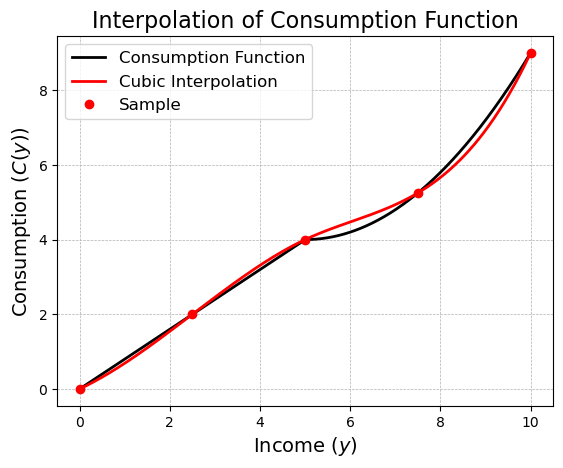

In [50]:
# Plotting interpolation
plt.figure()
plt.plot(y_values, C_values, label='Consumption Function', color='black', lw=2)
plt.plot(y_values, C_interpolation, label='Cubic Interpolation', color='red', lw=2)
plt.plot(y_sample, C_sample, 'o', label='Sample', color='red')

## Title and labels
plt.title('Interpolation of Consumption Function', fontsize=16)
plt.xlabel(r'Income ($y$)', fontsize=14)
plt.ylabel(r'Consumption ($C(y)$)', fontsize=14)

## Adding grid, legend, and axis lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

## Show plot
plt.show()

In [51]:
# Calculating RMSE
rmse_interpolation = np.sqrt(np.mean((C_values - C_interpolation)**2))
print(f"RMSE of Cubic Spline Interpolation with {nodes} nodes: {round(rmse_interpolation, 4)}")

RMSE of Cubic Spline Interpolation with 5 nodes: 0.1495
RMSE of Cubic Spline Interpolation with 5 nodes: 0.1495


### (b) Approximating $C(y)$ with a Cubic Spline Using 10 Nodes

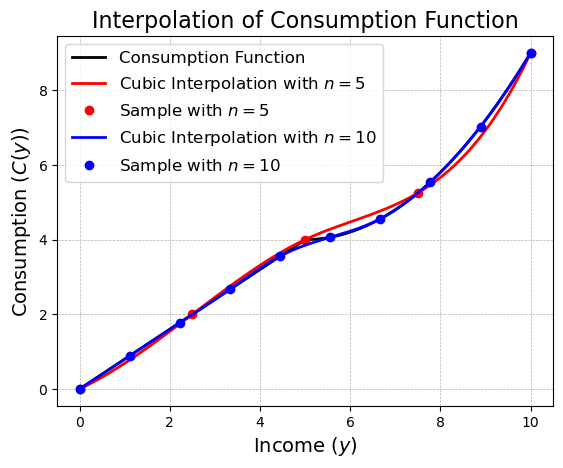

In [52]:
# Doing everything everywhere all at once
nodes = 10

# Values of y
y_sample10 = np.linspace(min_y, max_y, nodes)

# Values of consumption
C_sample10 = [piecewise_consumption(y) for y in y_sample10]

# Creating spline interpolation object and interpolation itself
cubic_spline10 = CubicSpline(y_sample10, C_sample10)
C_interpolation10 = cubic_spline10(y_values)

# Plotting interpolation
plt.figure()
plt.plot(y_values, C_values, label='Consumption Function', color='black', lw=2)

plt.plot(y_values, C_interpolation, label=r'Cubic Interpolation with $n = 5$', color='red', lw=2)
plt.plot(y_sample, C_sample, 'o', label=r'Sample with $n = 5$', color='red')

plt.plot(y_values, C_interpolation10, label=r'Cubic Interpolation with $n = 10$', color='blue', lw=2)
plt.plot(y_sample10, C_sample10, 'o', label=r'Sample with $n = 10$', color='blue')

## Title and labels
plt.title('Interpolation of Consumption Function', fontsize=16)
plt.xlabel(r'Income ($y$)', fontsize=14)
plt.ylabel(r'Consumption ($C(y)$)', fontsize=14)

## Adding grid, legend, and axis lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

## Show plot
plt.show()

In [53]:
# Calculating RMSE
rmse_interpolation10 = np.sqrt(np.mean((C_values - C_interpolation10)**2))
print(f"RMSE of Cubic Spline Interpolation with {nodes} nodes: {round(rmse_interpolation10, 4)}")

RMSE of Cubic Spline Interpolation with 10 nodes: 0.0277
RMSE of Cubic Spline Interpolation with 10 nodes: 0.0277


We see that the interpolation is significantly better with the larger number of nodes.
The main difference comes from the interval between 5 and 7.5, right after the kink of the consumption function.

This is because with 10 nodes we are able to better capture this kink (with have observations of $y = 4$ and $y = 6$), while with 5 nodes our observation falls right at the kink ($y = 5$).

In general, if we are able to control the number of observations, the more the better for the accuracy of the interpolation process.

### (c) Sensitivity Analysis

In [54]:
# List with RMSEs
rmse_interpolation_sens_list = []

# Iterating across different number of nodes
for num_nodes in range(5, 50):
    # Values of y
    y_sample_sens = np.linspace(min_y, max_y, num_nodes)

    # Values of consumption
    C_sample_sens = [piecewise_consumption(y) for y in y_sample_sens]

    # Creating spline interpolation object and interpolation itself
    cubic_spline_sens = CubicSpline(y_sample_sens, C_sample_sens)
    C_interpolation_sens = cubic_spline_sens(y_values)

    # Calculating RMSE and appending to list
    rmse_interpolation_sens = np.sqrt(np.mean((np.array(C_values) - np.array(C_interpolation_sens))**2))
    rmse_interpolation_sens_list.append(rmse_interpolation_sens)

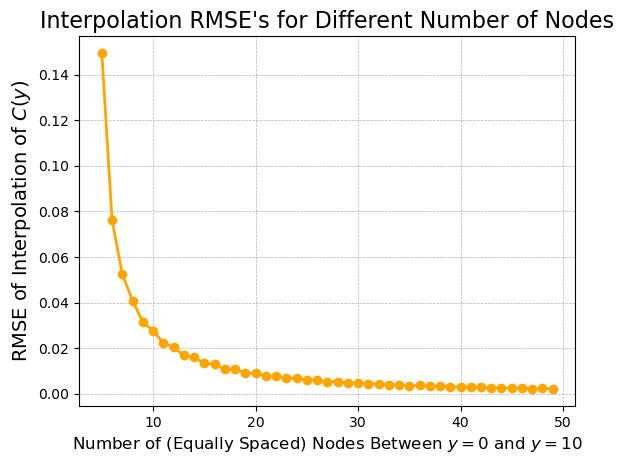

In [55]:
# Plotting RMSes
plt.figure()
plt.plot(range(5, 50), rmse_interpolation_sens_list, color='orange', lw=2)
plt.plot(range(5, 50), rmse_interpolation_sens_list, 'o', color='orange')

## Title and labels
plt.title("Interpolation RMSE's for Different Number of Nodes", fontsize=16)
plt.xlabel(r'Number of (Equally Spaced) Nodes Between $y = 0$ and $y = 10$', fontsize=12)
plt.ylabel(r'RMSE of Interpolation of $C(y)$', fontsize=14)

## Adding grid, legend, and axis lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

## Show plot
plt.show()

We see that the relationship between the number of nodes and the RMSE of the interpolation follows a decreasing exponential curve.

That is, RMSE decreases are proportional to **percentage increases** in the number of nodes.

### (d) Optimal Value of Nodes

As said above, the RMSE is inversely proportional to the percentage increase in the number of nodes.
Thus, as a rule of thumb, we think that $n = 20$ is a good number, as marginally increasing the number of nodes only increases the total by 5%.

The RMSE is also very low, being close to 0.006.

## Question 5 - Approximating $\pi$ using Monte Carlo Simulations

### (a) Algorithm Description

Fix $r \in \mathbb{R}$.
To estimate $\pi$, we will first define a grid of perimeter $8r$ (so each side is $2r$).
At the center of the grid, we will inscribe a circumference of diameter $2r$ (so the radius is $r$).

Then, we will proceed by randomly drawing coordinates $(x, y) \in [-r, r]^2 \in \mathbb{R}^2$ (the center of the square/circle will be defined as $(0, 0)$).

The random draws will be generated by sampling from a $U[-r, r]$ distribution. Note that, for every point, we make two draws: one for the $x$ coordinate and other for the $y$ coordinate.

To approximate $\pi$, we will use the ratio of the areas between the circle (area $\pi r^2$) and the square (area $4r^2$).

Since we know that only those points with $x^2 + y^2 \leq r^2$ fall inside the circle, we can count how many points fall inside the circumference and use it as a measure of its area.

That is, we know that

$\frac{\text{Area}_{\text{circle}}}{\text{Area}_{\text{square}}} = \frac{\pi}{4}$

Letting $N$ denote the number of points created and $M$ denote the number that fall inside the circle, we will then have that

$\pi \approx 4 * \frac{M}{N}$

### (b) Estimating $\pi$

In [56]:
# Parameters
## Number of points generated
N = 100
## Number of points that fall inside the circle
M = 0

## Defining r; for simplicity, take r = 1
radius = 1

## Creating lists to store the coordinates of the points
### Points inside the circle
points_circle_x = []
points_circle_y = []

### Points outside the circle (for the plot)
points_square_x = []
points_square_y = []

In [57]:
# Simulating the points
for p in range(N):
    # Random coordinantes
    x = random.uniform(-radius, radius)
    y = random.uniform(-radius, radius)

    # Checking if the point falls inside the circle
    if x**2 + y**2 <= radius**2:
        # Adding to count and appending to lists
        M += 1
        points_circle_x.append(x)
        points_circle_y.append(y)
    # if the point falls outside, just add it to the list
    else:
        points_square_x.append(x)
        points_square_y.append(y)

# Approximating pi
pi_approx = 4 * M / N

# Printing
print(f"Aproximation of pi: {round(pi_approx, 5)}")
print(f"pi: {round(np.pi, 5)}")

Aproximation of pi: 2.64
pi: 3.14159
Aproximation of pi: 2.64
pi: 3.14159


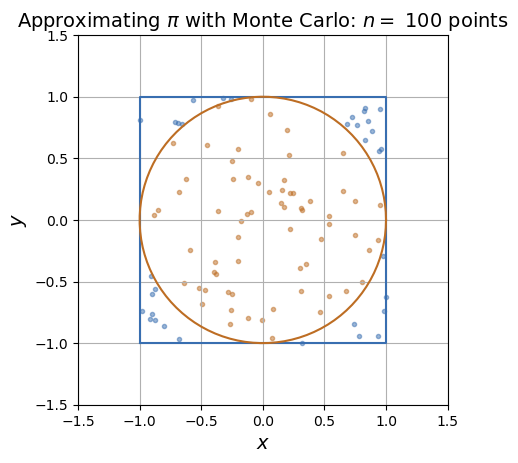

In [58]:
# Values for the grid
grid = np.linspace(-radius, radius)

# Angle for the circle
theta = np.linspace(0, 2 * np.pi, 100) 

# Circle coordinates
circle_line_x = radius * np.cos(theta)
circle_line_y = radius * np.sin(theta)

# Square coordinates
square_line_x = np.array([-radius, radius, radius, -radius, -radius])
square_line_y = np.array([-radius, -radius, radius, radius, -radius])

# Create the plot
fig, ax = plt.subplots()

# Define earth-like tones for colors
square_color = '#386eb0'  # Slate Gray
circle_color = '#bd6d23'  # Olive Drab

# Lines
ax.plot(square_line_x, square_line_y, color=square_color) 
ax.plot(circle_line_x, circle_line_y, color=circle_color)

# Points with opacity
plt.scatter(points_square_x, points_square_y, color=square_color, marker=".", alpha=0.5)
plt.scatter(points_circle_x, points_circle_y, color=circle_color, marker=".", alpha=0.5)
 

# Set limits to fit the square and circle
ax.set_xlim(-radius - .5, radius + .5)
ax.set_ylim(-radius - .5, radius + .5)

# Add grid, title and labels
ax.grid(True)
ax.set_aspect('equal')
plt.title(fr'Approximating $\pi$ with Monte Carlo: $n =$ {N} points', fontsize=14)
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y$', fontsize=14)

# Show the plot
plt.show()

We see that our approximation of $\pi$ is pretty poor, as we are only using 100 points in the simulation.
We correct this in the next item.

### (c) Estimating $\pi$ with more draws

In [59]:
# List of draws
num_draws_list = np.linspace(5*10**3, 10**5, 20)

# List to store pi approximations
pi_approx_list = []

# Simulating
for num_draws in num_draws_list:
    # Number of points inside the circle
    M = 0

    # Simulating the points
    for p in range(int(num_draws)):
        # Random coordinantes
        x = random.uniform(-radius, radius)
        y = random.uniform(-radius, radius)

        # Checking if the point falls inside the circle
        M = M + 1 if x**2 + y**2 <= radius**2 else M

    # Approximating pi
    pi_approx_list.append(4 * M / int(num_draws))

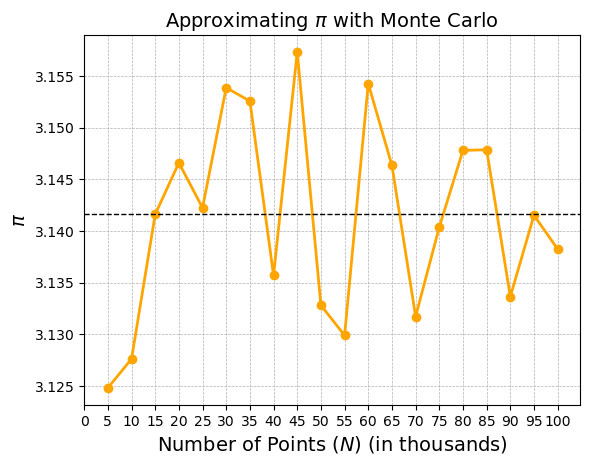

In [60]:
# Plotting pis
plt.figure()

plt.plot(num_draws_list / 1000, pi_approx_list, color='orange', lw=2)
plt.plot(num_draws_list / 1000, pi_approx_list, 'o', color='orange')
plt.axhline(y=np.pi, color='black', linestyle='--', linewidth=1)

## Title and labels
plt.title(fr'Approximating $\pi$ with Monte Carlo', fontsize=14)
plt.xlabel(r'Number of Points ($N$) (in thousands)', fontsize=14)
plt.ylabel(r'$\pi$', fontsize=14)

## Adding grid and axis lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

## Set x-axis ticks to display every 5000 units
plt.xticks(np.arange(0, max(num_draws_list / 1000) + 1, 5))

## Show plot
plt.show()

As expected, the bigger the number of points, the closer our estimation is to the true value of $\pi$, which is represented in the figure above by the black dashed line.

## Question 6 - Two-Period Model

Consider the following two-period $(t = 0,1)$ standard model economy. Preferences are over consumption $c$ and hours worked $h$ and are represented by

$$
U = \sum_{t=0}^{1} \beta^t \left[ u(c_t) - \chi v(h_t) \right], \quad \beta \in (0,1),
$$

which can be written as

$$
U = \left[ u(c_0) - \chi v(h_0) \right] + \beta \left[ u(c_1) - \chi v(h_1) \right],
$$

where

$$
u(c) = \frac{c^{1-\sigma}-1}{1-\sigma} \quad \text{and} \quad v(h) = \frac{h^{1+\eta}-1}{1+\eta} \quad \text{with } (\sigma, \eta) \in \mathbb{R}_{++}^2.
$$

On the production side, there is a competitive firm, with access to a technology to produce the consumption good:

$$
Y_t = A_t L_t^\alpha, \quad A_t > 0 \quad \text{and} \quad \alpha \in (0,1),
$$

where $Y_t$ is output, $L_t$ denotes labor input, and $A_t$ is a productivity factor. Suppose that there is an asset market where agents can trade one-period bonds among themselves.


### (a) Problem of Each Agent and Market Clearing Conditions

We also assume that agents can effectively only save through bonds, which pay a interest rate of $r$ in period 1. 
Let $b_0$ be the amount purchased in bonds (savings) in period 0.
Note that $b_0 < 0$ implies that the agent sold bonds.

Let $w_t$ denote the wage paid by the firm and received by the consumer in period $t$.
We consider $h_t$ as *percentage* of the time worked, so that $0 < h_t < 1$.

As in a standard model, we assume that the firm is *owned by the agent*, so that, letting $\pi_t = A_t L_t^\alpha - w_t L_t$ be the firm's profit at period $t$, the agent's income is given by.

$$\text{Income}_0 = w_0 h_0 + \pi_0 \quad \text{and} \quad \text{Income}_1 = w_1 h_1 + \pi_1 + (1+r) b_0$$

For a final remark, we normalize so that the price of the good is equal to 1 in both periods (no inflation or readjustment).

#### Consumer

The problem of the representative consumer is

$$
\max_{(c_0, c_1, h_0, h_1)} \left\{u(c_0) + \beta u(c_1) - \chi \left[v(h_0) + \beta v(h_1) \right] \right\}
$$ 

subject to

$\begin{cases}
\text{Budget Constraint 0}: c_0 + b_0  \leq h_0 w_0 + \pi_0 \\
\text{Budget Constraint 1}: c_1 \leq h_1 w_1 + (1+r) b_0 + \pi_1 \\
\text{Labor Supply 0}: 0 \leq h_0 \leq 1 \\
\text{Labor Supply 1}: 0 \leq h_1 \leq 1 \\
\text{Positive Consumption 0}: c_0 \geq 0 \\
\text{Positive Consumption 1}: c_1 \geq 0
\end{cases}$

#### Firm

The firm wants to maximize the present value of its profits, given by $\Pi = \pi_0 + \frac{\pi_1}{1+r}$. 
Her problem then is

$$
\max_{L_t} \left \{\pi_0 + \frac{1}{1+r} \pi_1 \right \} = \max_{L_t} \left \{A_0 L_0^\alpha - w_0 L_0 + \frac{1}{1+r} \left[A_1 L_1^\alpha - w_1 L_1 \right] \right \}
$$

#### Market Clearing

We have the following market clearing conditions:

$\begin{cases}
\text{Labour Market 0}: h_0 = L_0 \\
\text{Labour Market 1}: h_1 = L_1 \\
\text{Goods Market 0}: c_0 = Y_0 \\
\text{Goods Market 1}: c_1 = Y_1 \\
\text{Bond Market}: b_0 = 0
\end{cases}$

#### Endogenous Variables

Our endogenous variables that we wish to solve for are thus $(c_0, c_1, h_0, h_1, Y_0, Y_1, L_0, L_1)$ and $(r, w_0, w_1)$ - the last of which are the vector of relative prices.

We then have **11 endogenous variables**.

### (b) Competitive Equilibrium

As in Microeconomics courses, a competitive equilibrium happens when all agents maximize their value functions and markets clear.

In our case, the competitive equilibrium is a tuple $(c_0, c_1, h_0, h_1, Y_0, Y_1, L_0, L_1, r, w_0, w_1)$ such that the representative consumer maximizes its intertemporal utility, firms maximize the present value of profit and the markets for goods and labour clear.

### (c) First Order and Market Clearing Conditions

#### Consumer

As $u(c) = \frac{c^{1-\sigma}-1}{1-\sigma}$, $v(h) = \frac{h^{1+\eta}-1}{1+\eta}$ and $(\sigma, \eta) \in \mathbb{R}_{++}^2$, all the usual conditions hold and we can write the consumer's problem as

$$
\max_{(c_0, c_1, h_0, h_1)} \left\{\frac{c_0^{1-\sigma}-1}{1-\sigma} + \beta \left(\frac{c_1^{1-\sigma}-1}{1-\sigma} \right) - \chi \left[\frac{h_0^{1+\eta}-1}{1+\eta} + \beta \left( \frac{h_1^{1+\eta}-1}{1+\eta}\right) \right] \right\}
$$ 

$$
\text{subject to}\begin{cases}
\text{Budget Constraint 0}: c_0 + b_0 = h_0 w_0 + \pi_0 \\
\text{Budget Constraint 1}: c_1 = h_1 w_1 + (1+r) b_0 + \pi_1
\end{cases}
$$

Since we have no credit constraints, we can create a intertemporal budget constraint through the bonds:

$
b_0 = h_0 w_0 + \pi_0 - c_0 
\quad \therefore \quad
c_1 = h_1 w_1 + (1+r) (h_0 w_0 + \pi_0 - c_0) + \pi_1
\quad \therefore \quad
(1+r)c_0 + c_1 = (1+r)h_0 w_0 + h_1 w_1 + (1+r)\pi_0 + \pi_1
$

The problem can again be rewritten as

$$
\max_{(c_0, c_1, h_0, h_1)} \left\{\frac{c_0^{1-\sigma}-1}{1-\sigma} + \beta \left(\frac{c_1^{1-\sigma}-1}{1-\sigma} \right) - \chi \left[\frac{h_0^{1+\eta}-1}{1+\eta} + \beta \left( \frac{h_1^{1+\eta}-1}{1+\eta}\right) \right] \right\}
$$ 

$$
\text{subject to} \quad (1+r)h_0 w_0 + h_1 w_1 + (1+r)\pi_0 + \pi_1 - (1+r)c_0 - c_1 = 0
$$

The Lagrangean of the problem can be expressed as

$$
\begin{align*}
\mathscr{L}(c_0, c_1, h_0, h_1, \lambda) 
&= \frac{c_0^{1-\sigma}-1}{1-\sigma} + \beta \left(\frac{c_1^{1-\sigma}-1}{1-\sigma} \right)
- \chi \left[\frac{h_0^{1+\eta}-1}{1+\eta} + \beta \left( \frac{h_1^{1+\eta}-1}{1+\eta}\right) \right] \\
&\quad + \lambda \left[(1+r)h_0 w_0 + h_1 w_1 + (1+r)\pi_0 + \pi_1 - (1+r)c_0 - c_1 \right]
\end{align*}
$$

The FOCs are given by

$
(1) \frac{\partial \mathscr{L}}{\partial c_0} = 0 = c_0^{-\sigma} - \lambda(1+r)
$

$
(2) \frac{\partial \mathscr{L}}{\partial h_0} = 0 = -\chi h_0^{\eta} + \lambda(1+r)w_0
$

$
(3) \frac{\partial \mathscr{L}}{\partial c_1} = 0 = \beta c_1^{-\sigma} - \lambda
$

$
(4) \frac{\partial \mathscr{L}}{\partial h_1} = 0 = -\chi \beta h_1^{\eta} + \lambda w_1
$

(note that we are treating the labour inputs in $\pi_t$ as exogenous in this case, effectively separating the choices of the consumer and the firm)

If we divide (2) by (1) and (4) by (3), we get the conditions that the marginal rate of substitution between leisure/work and consumption has to equal the wage, as we normalized the price of the good to be 1:

$
(i) \frac{\chi h_0^{\eta}}{c_0^{-\sigma}} = w_0
$

$
(ii) \frac{\chi h_1^{\eta}}{c_1^{-\sigma}} = w_1
$



We can also divide (1) by (3) to get that the marginal rate of substitution between consumption in both periods has to be equal to the marginal cost of future consumption ($(1+r)$) times the discount factor:

$
(iii) \frac{c_0^{-\sigma}}{c_1^{-\sigma}} = \beta (1+r)
\quad \therefore \quad
c_1 = c_0 [\beta (1+r)]^{\frac{1}{\sigma}}
$

We also have that $r = \frac{1}{\beta} \left(\frac{c_1}{c_0}\right)^\sigma - 1$.



#### Firms

The FOCs of the problem of the firm are

$
(5) \frac{\partial \Pi}{\partial L_0} = 0 = \alpha A_0 L_0^{\alpha - 1} - w_0  
$

$
(6) \frac{\partial \Pi}{\partial L_0} = 0 = \alpha A_1 L_1^{\alpha - 1} - w_1  
$

Thus, we get the usual result that the wage in both periods must equal the marginal productivity of labor.

#### Using Market Clearing Condition to Try to Find a Solution

Recall that, by market clearing, 

$$c_t = Y_t = A_t L_t^\alpha \quad \text{and} \quad h_t = L_t \quad \text{for } t = 0, 1$$ 

Also, combining (i) with (5) and (ii) with (6), we get

$$
\frac{\chi h_0^{\eta}}{c_0^{-\sigma}} = w_0 = \alpha A_0 L_0^{\alpha - 1}
$$

$$
\frac{\chi h_1^{\eta}}{c_1^{-\sigma}} = w_1 = \alpha A_1 L_1^{\alpha - 1}
$$

From (iii),

$$
c_1 = c_0 [\beta (1+r)]^{\frac{1}{\sigma}}
$$

If we keep count, we have 11 equations and, from (a), we have 11 endogenous variables.

If we used the market clearing conditions, we get

$$
\frac{\chi L_0^{\eta}}{\left(A_0 L_0^\alpha\right)^{-\sigma}} = \alpha A_0 L_0^{\alpha - 1}
$$

$$
\frac{\chi L_1^{\eta}}{\left(A_1 L_1^\alpha\right)^{-\sigma}} = \alpha A_1 L_1^{\alpha - 1}
$$

These two equations implicitly define $L_0$ and $L_1$ as functions of exogenous parameters and, as a consequence, $Y_0 = c_0$ and $Y_1 = c_1$, as well as $h_0 = L_0$ and $h_1 = L_1$.

We can then use (iii) to find $r$ and (5) and (6) to find $w_0$ and $w_1$, respectively.

Thus, we conclude our quest of solving for the 11 endogenous variables of the model.

Solving for $L_t$ for $t = 0, 1$ gives

$$
\frac{\chi L_t^{\eta + \alpha \sigma}}{A_t^{-\sigma}} = \alpha A_t L_t^{\alpha -1}
\quad \therefore \quad
L_t^{\eta + \alpha \sigma + 1 - \alpha} = \chi^{-1} \alpha A_t^{1 - \sigma}
\quad \therefore \quad
L_t = \left[ \chi^{-1} \alpha A_t^{1 - \sigma} \right]^{\frac{1}{\eta + \alpha \sigma + 1 - \alpha}}
$$

### (d) Solution for the Model

In [61]:
# Parameters
## Firm
A0 = 1
A1 = 1
alpha = .6

## Consumer
sigma = 2
eta = 5
beta = .98 ** 25
chi = 1

##### Analytical (baseline)

We will only calculate labour, so as to check our solution.

As we saw in the previous item, if we calculate the optimal labour, we can easily attain the other parameters.

In [62]:
# Functions
def analytical_optimal_labour(A, chi=chi, alpha=alpha, sigma=sigma, eta=eta):
    return (chi**(-1) * alpha * A**(1 - sigma))**(1 / (eta + alpha * sigma + 1 - alpha))

In [63]:
# Optimal labour
optimal_labor0 = analytical_optimal_labour(A=A0)
optimal_labor1 = analytical_optimal_labour(A=A1)

print(f"Optimal Labor in t=0: {round(optimal_labor0, 4)}.")
print(f"Optimal Labor in t=1: {round(optimal_labor1, 4)}.")

Optimal Labor in t=0: 0.9255.
Optimal Labor in t=1: 0.9255.
Optimal Labor in t=0: 0.9255.
Optimal Labor in t=1: 0.9255.


#### Numerical

Useful facts about our exercise:

- The optimal labor choice in one period is completely independent from the labor choice in the other period;
- We necessarily have that $L_t \in (0, 1)$ for $t = 0, 1$.

The only thing we need to check is if the function that characterizes the optimal labour satisfies the Intermediate Value Theorem condition; if it does, we can use the bisection method.

In other words, we need to check the graph of

$$F(L_t; A_t, \alpha, \sigma, \eta, \beta, \chi) = \chi L_t^{\eta + \alpha \sigma} - \alpha A_t^{1 - \sigma} L_t^{\alpha -1}$$

to see if the function is such that

$$F(0) < 0 \text{ and } F(1) > 0 \quad \text{or} \quad F(0) > 0 \text{ and } F(1) > 0

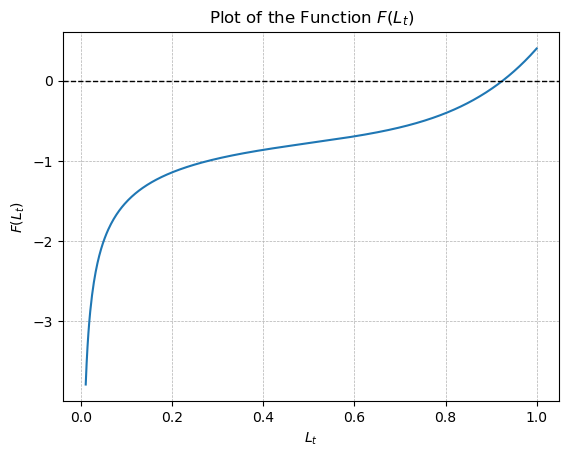

In [64]:
# Define the function
def F_labor(L, A, alpha=alpha, sigma=sigma, eta=eta, beta=beta, chi=chi):
    return chi * L**(eta + alpha * sigma) - alpha * A**(1 - sigma) * L**(alpha - 1)

# L_t values
L_values = np.linspace(0.01, 1, 500)

# Calculate F(L)
F_L_values = F_labor(L_values, A=A0)

# Plot the function
## Graph
plt.figure()
plt.plot(L_values, F_L_values)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

## Title and labels
plt.xlabel(r'$L_t$')
plt.ylabel(r'$F(L_t)$')
plt.title('Plot of the Function $F(L_t)$')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

## Show plot
plt.show()

We can thus use the **bisection method** to find the labour supply of each period! 
For that, we will use the function we defined in *Question 1*.

In [65]:
# Defining functions for each period
## Labor (supply and demanded)
def F_labor0(L, A=A0, alpha=alpha, sigma=sigma, eta=eta, beta=beta, chi=chi):
    return chi * L**(eta + alpha * sigma) - alpha * A**(1 - sigma) * L**(alpha - 1)

def F_labor1(L, A=A1, alpha=alpha, sigma=sigma, eta=eta, beta=beta, chi=chi):
    return chi * L**(eta + alpha * sigma) - alpha * A**(1 - sigma) * L**(alpha - 1)

## Production (= consumption)
def Y_func(L, A, alpha=alpha):
    return A * L**alpha

## Wages (= marginal productivity)
def w_func(L, A, alpha=alpha):
    return alpha * L**(alpha - 1)

## Interest rate (total and annual)
def r_func(c0, c1, sigma=sigma, beta=beta):
    r = 1 / beta * (c1 / c0)**sigma - 1
    return r, (1 + r) ** (1 / 25) - 1

## Profits
def pi_func(L, w, A, alpha=alpha):
    return A * L**alpha - w*L

## Income
def income0_func(L, w, pi):
    return L * w + pi

def income1_func(L, w, pi, r, b):
    return L * w + pi + (1 + r) * b

## Savings/bonds
def bond_func(c, income0):
    return income0 - c

In [66]:
# Applying the bisection method to find the optimal labor in both periods
opt_labor0, num_iter_labor0, labor0_guess = bisection_method(func=F_labor0, a=0.0001, b=1, tol=10**(-8))
opt_labor1, num_iter_labor1, labor1_guess = bisection_method(func=F_labor1, a=0.0001, b=1, tol=10**(-8))

# Production/consumption
opt_c0 = Y_func(opt_labor0, A=A0)
opt_c1 = Y_func(opt_labor1, A=A1)

# Wages
opt_w0 = w_func(opt_labor0, A=A0)
opt_w1 = w_func(opt_labor1, A=A1)

# Interest rate
opt_r, opt_r_annual = r_func(opt_c0, opt_c1, sigma=sigma)

# Profits
opt_pi0 = pi_func(opt_labor0, opt_w0, A=A0)
opt_pi1 = pi_func(opt_labor1, opt_w1, A=A1)

# Income at t = 0
opt_income0 = income0_func(opt_labor0, opt_w0, opt_pi0)

# Bonds
opt_b0 = bond_func(opt_c0, opt_income0)

# Income at t = 1
opt_income1 = income1_func(opt_labor1, opt_w1, opt_pi1, opt_r, opt_b0)

In [67]:
# Printing results
print(f"Labor Supply/Demand in period 0: {round(opt_labor0, 3)}.")
print(f"Labor Supply/Demand in period 1: {round(opt_labor1, 3)}.")

print(f"\nConsumption/Production in period 0: {round(opt_c0, 3)}.")
print(f"Consumption/Production in period 1: {round(opt_c1, 3)}.")

print(f"\nWages in period 0: {round(opt_w0, 3)}.")
print(f"Wages in period 1: {round(opt_w1, 3)}.")

print(f"\nInterest rate: {round(100*opt_r, 2)}%.")
print(f"Annualized interest rate: {round(100*opt_r_annual, 2)}%.")

print(f"\nProfits in period 0: {round(opt_pi0, 3)}.")
print(f"Profits in period 1: {round(opt_pi1, 3)}.")

print(f"\nIncome in period 0: {round(opt_income0, 3)}.")
print(f"Income in period 1: {round(opt_income1, 3)}.")
print(f"Bond balance: {round(opt_b0, 3)}.")


Labor Supply/Demand in period 0: 0.926.
Labor Supply/Demand in period 1: 0.926.

Consumption/Production in period 0: 0.955.
Consumption/Production in period 1: 0.955.

Wages in period 0: 0.619.
Wages in period 1: 0.619.

Interest rate: 65.71%.
Annualized interest rate: 2.04%.

Profits in period 0: 0.382.
Profits in period 1: 0.382.

Income in period 0: 0.955.
Income in period 1: 0.955.
Bond balance: 0.0.
Labor Supply/Demand in period 0: 0.926.
Labor Supply/Demand in period 1: 0.926.

Consumption/Production in period 0: 0.955.
Consumption/Production in period 1: 0.955.

Wages in period 0: 0.619.
Wages in period 1: 0.619.

Interest rate: 65.71%.
Annualized interest rate: 2.04%.

Profits in period 0: 0.382.
Profits in period 1: 0.382.

Income in period 0: 0.955.
Income in period 1: 0.955.
Bond balance: 0.0.


### (e) Fall in 1st Period Productivity

In [68]:
# Changing A0 to .9 
# (terrible programming etiquette to keep the same names, but couldn't bother to change the functions)
A0 = .9
A1 = 1

# Redefining functions
def F_labor0(L, A=A0, alpha=alpha, sigma=sigma, eta=eta, beta=beta, chi=chi):
    return chi * L**(eta + alpha * sigma) - alpha * A**(1 - sigma) * L**(alpha - 1)

def F_labor1(L, A=A1, alpha=alpha, sigma=sigma, eta=eta, beta=beta, chi=chi):
    return chi * L**(eta + alpha * sigma) - alpha * A**(1 - sigma) * L**(alpha - 1)

# Applying the bisection method to find the optimal labor in both periods
opt_labor0_A0, num_iter_labor0_A0, labor0_guess_A0 = bisection_method(func=F_labor0, a=0.0001, b=1, tol=10**(-8))
opt_labor1_A0, num_iter_labor1_A0, labor1_guess_A0 = bisection_method(func=F_labor1, a=0.0001, b=1, tol=10**(-8))

# Production/consumption
opt_c0_A0 = Y_func(opt_labor0_A0, A=A0)
opt_c1_A0 = Y_func(opt_labor1_A0, A=A1)

# Wages
opt_w0_A0 = w_func(opt_labor0_A0, A=A0)
opt_w1_A0 = w_func(opt_labor1_A0, A=A1)

# Interest rate
opt_r_A0, opt_r_annual_A0 = r_func(opt_c0_A0, opt_c1_A0, sigma=sigma)

# Profits
opt_pi0_A0 = pi_func(opt_labor0_A0, opt_w0_A0, A=A0)
opt_pi1_A0 = pi_func(opt_labor1_A0, opt_w1_A0, A=A1)

# Income at t = 0
opt_income0_A0 = income0_func(opt_labor0_A0, opt_w0_A0, opt_pi0_A0)

# Bonds
opt_b0_A0 = bond_func(opt_c0_A0, opt_income0_A0)

# Income at t = 1
opt_income1_A0 = income1_func(opt_labor1_A0, opt_w1_A0, opt_pi1_A0, opt_r_A0, opt_b0_A0)


In [69]:
# Create dictionaries for each set of variables
data_set1 = {
    "L*(0)": opt_labor0,
    "L*(1)": opt_labor1,
    "C*(0)": opt_c0,
    "C*(1)": opt_c1,
    "w*(0)": opt_w0,
    "w*(1)": opt_w1,
    "r*": opt_r,
    "r*_annual": opt_r_annual,
    "π*(0)": opt_pi0,
    "π*(1)": opt_pi1,
    "Income*(0)": opt_income0,
    "Income*(1)": opt_income1
}

data_set2 = {
    "L*(0)": opt_labor0_A0,
    "L*(1)": opt_labor1_A0,
    "C*(0)": opt_c0_A0,
    "C*(1)": opt_c1_A0,
    "w*(0)": opt_w0_A0,
    "w*(1)": opt_w1_A0,
    "r*": opt_r_A0,
    "r*_annual": opt_r_annual_A0,
    "π*(0)": opt_pi0_A0, 
    "π*(1)": opt_pi1_A0,
    "Income*(0)": opt_income0_A0,
    "Income*(1)": opt_income1_A0
}

In [70]:
# Checking difference
data_set_diff12 = {
    key: data_set2[key] - data_set1[key] for key in data_set1.keys()
}

# Create the DataFrame to compare
df_parameters_comparison12 = pd.DataFrame([data_set1, data_set2, data_set_diff12])

# Assign the desired row names
df_parameters_comparison12.index = ["A0 = 1 A1 = 1", "A0 = .9 A1 = 1", "Difference"]

# Display the DataFrame
print(df_parameters_comparison12.round(3))

# For the df to fit in the console, probably want to go full screen

                L*(0)  L*(1)  C*(0)  C*(1)  w*(0)  w*(1)     r*  r*_annual  π*(0)  π*(1)  Income*(0)  Income*(1)
A0 = 1 A1 = 1   0.926  0.926  0.955  0.955  0.619  0.619  0.657      0.020  0.382  0.382       0.955       0.955
A0 = .9 A1 = 1  0.940  0.926  0.867  0.955  0.615  0.619  1.007      0.028  0.289  0.382       0.867       0.955
Difference      0.015  0.000 -0.087  0.000 -0.004  0.000  0.350      0.008 -0.093  0.000      -0.087       0.000
                L*(0)  L*(1)  C*(0)  C*(1)  w*(0)  w*(1)     r*  r*_annual  π*(0)  π*(1)  Income*(0)  Income*(1)
A0 = 1 A1 = 1   0.926  0.926  0.955  0.955  0.619  0.619  0.657      0.020  0.382  0.382       0.955       0.955
A0 = .9 A1 = 1  0.940  0.926  0.867  0.955  0.615  0.619  1.007      0.028  0.289  0.382       0.867       0.955
Difference      0.015  0.000 -0.087  0.000 -0.004  0.000  0.350      0.008 -0.093  0.000      -0.087       0.000


We see that, with the fall in the productivity of the first period ($t = 0$), output (and thus consumption by market clearing) is now lower, but only when the decrease happens, as we don't have spillovers across periods ($b_0 = 0$ by market clearing).
As a result, profits and incomes in period 0 are now lower, which also lead to wages falling.

To accomodate such a fall in consumption in period 0, the model requires that its marginal cost increase, which is given by the higher interest rate.

To mitigate the fall in productivity - which leads to a fall in consumption -, the agent decides to work more to smooth the consumption fall.

### (f) Fall in 2nd Period Productivity

In [71]:
# Changing A1 to .9 
# (terrible programming etiquette to keep the same names, but couldn't bother to change the functions)
A0 = 1
A1 = .9

# Redefining functions
def F_labor0(L, A=A0, alpha=alpha, sigma=sigma, eta=eta, beta=beta, chi=chi):
    return chi * L**(eta + alpha * sigma) - alpha * A**(1 - sigma) * L**(alpha - 1)

def F_labor1(L, A=A1, alpha=alpha, sigma=sigma, eta=eta, beta=beta, chi=chi):
    return chi * L**(eta + alpha * sigma) - alpha * A**(1 - sigma) * L**(alpha - 1)

# Applying the bisection method to find the optimal labor in both periods
opt_labor0_A1, num_iter_labor0_A1, labor0_guess_A1 = bisection_method(func=F_labor0, a=0.0001, b=1, tol=10**(-8))
opt_labor1_A1, num_iter_labor1_A1, labor1_guess_A1 = bisection_method(func=F_labor1, a=0.0001, b=1, tol=10**(-8))

# Production/consumption
opt_c0_A1 = Y_func(opt_labor0_A1, A=A0)
opt_c1_A1 = Y_func(opt_labor1_A1, A=A1)

# Wages
opt_w0_A1 = w_func(opt_labor0_A1, A=A0)
opt_w1_A1 = w_func(opt_labor1_A1, A=A1)

# Interest rate
opt_r_A1, opt_r_annual_A1 = r_func(opt_c0_A1, opt_c1_A1, sigma=sigma)

# Profits
opt_pi0_A1 = pi_func(opt_labor0_A1, opt_w0_A1, A=A0)
opt_pi1_A1 = pi_func(opt_labor1_A1, opt_w1_A1, A=A1)

# Income at t = 0
opt_income0_A1 = income0_func(opt_labor0_A1, opt_w0_A1, opt_pi0_A1)

# Bonds
opt_b0_A1 = bond_func(opt_c0_A1, opt_income0_A1)

# Income at t = 1
opt_income1_A1 = income1_func(opt_labor1_A1, opt_w1_A1, opt_pi1_A1, opt_r_A1, opt_b0_A1)

In [72]:
# Create dictionaries for each set of variables
data_set3 = {
    "L*(0)": opt_labor0_A1,
    "L*(1)": opt_labor1_A1,
    "C*(0)": opt_c0_A1,
    "C*(1)": opt_c1_A1,
    "w*(0)": opt_w0_A1,
    "w*(1)": opt_w1_A1,
    "r*": opt_r_A1,
    "r*_annual": opt_r_annual_A1,
    "π*(0)": opt_pi0_A1, 
    "π*(1)": opt_pi1_A1,
    "Income*(0)": opt_income0_A1,
    "Income*(1)": opt_income1_A1
}

In [73]:
# Checking difference
data_set_diff13 = {
    key: data_set3[key] - data_set1[key] for key in data_set1.keys()
}

# Create the DataFrame to compare
df_parameters_comparison13 = pd.DataFrame([data_set1, data_set3, data_set_diff13])

# Assign the desired row names
df_parameters_comparison13.index = ["A0 = 1 A1 = 1", "A0 = 1 A1 = .9", "Difference"]

# Display the DataFrame
print(df_parameters_comparison13.round(3))

                L*(0)  L*(1)  C*(0)  C*(1)  w*(0)  w*(1)     r*  r*_annual  π*(0)  π*(1)  Income*(0)  Income*(1)
A0 = 1 A1 = 1   0.926  0.926  0.955  0.955  0.619  0.619  0.657      0.020  0.382  0.382       0.955       0.955
A0 = 1 A1 = .9  0.926  0.940  0.955  0.867  0.619  0.615  0.368      0.013  0.382  0.289       0.955       0.867
Difference      0.000  0.015  0.000 -0.087  0.000 -0.004 -0.289     -0.008  0.000 -0.093       0.000      -0.087
                L*(0)  L*(1)  C*(0)  C*(1)  w*(0)  w*(1)     r*  r*_annual  π*(0)  π*(1)  Income*(0)  Income*(1)
A0 = 1 A1 = 1   0.926  0.926  0.955  0.955  0.619  0.619  0.657      0.020  0.382  0.382       0.955       0.955
A0 = 1 A1 = .9  0.926  0.940  0.955  0.867  0.619  0.615  0.368      0.013  0.382  0.289       0.955       0.867
Difference      0.000  0.015  0.000 -0.087  0.000 -0.004 -0.289     -0.008  0.000 -0.093       0.000      -0.087


The analysis is the same as in the previous item, but flipped: output and consumption are now lower in the second period ($t = 1$), which also drives down profits and income, as well as wages.

To accomodate such a fall in consumption in the second period, consumption in the first period has to be less expensive, and so we have a fall in the interest rate.

To mitigate the fall in productivity - which leads to a fall in consumption -, the agent decides to work more to smooth the consumption fall.

### (g) $\sigma = 1.5$

Note that $\sigma$ is a measure of the intertemporal elasticity of consumption: higher values of $\sigma$ indicate higher risk aversion, and so less willingness to trade consumption between periods.

Therefore, although we expect deviations due to productivity falls to be the in the same direction as before, the magnitudes of it shall be different.
As we are decreasing $\sigma$, we expect that these deviations become less smooth.

We can also interpret the fall in $\sigma$ as agents valuing consumption less relative to leisure (recall the relationship between hours worked and consumption in the FOC of the consumer), which would decrease hours worked and, thus, output and consumption.

##### Redoing (d)

In [74]:
# Changing parameters
A0 = 1
A1 = 1
sigma = 1.5  # instead of 2 previously

# Calculating optimal labor
opt_labor0_sigma = analytical_optimal_labour(A=A0, sigma=sigma)
opt_labor1_sigma = analytical_optimal_labour(A=A1, sigma=sigma)

# Production/consumption
opt_c0_sigma = Y_func(opt_labor0_sigma, A=A0)
opt_c1_sigma = Y_func(opt_labor1_sigma, A=A1)

# Wages
opt_w0_sigma = w_func(opt_labor0_sigma, A=A0)
opt_w1_sigma = w_func(opt_labor1_sigma, A=A1)

# Interest rate
opt_r_sigma, opt_r_annual_sigma = r_func(opt_c0_sigma, opt_c1_sigma, sigma=sigma)

# Profits
opt_pi0_sigma = pi_func(opt_labor0_sigma, opt_w0_sigma, A=A0)
opt_pi1_sigma = pi_func(opt_labor1_sigma, opt_w1_sigma, A=A1)

# Income at t = 0
opt_income0_sigma = income0_func(opt_labor0_sigma, opt_w0_sigma, opt_pi0_sigma)

# Bonds
opt_b0_sigma = bond_func(opt_c0_sigma, opt_income0_sigma)

# Income at t = 1
opt_income1_sigma = income1_func(opt_labor1_sigma, opt_w1_sigma, opt_pi1_sigma, opt_r_sigma, opt_b0_sigma)

In [75]:
# Create dictionaries for each set of variables
data_set1_sigma = {
    "L*(0)": opt_labor0_sigma,
    "L*(1)": opt_labor1_sigma,
    "C*(0)": opt_c0_sigma,
    "C*(1)": opt_c1_sigma,
    "w*(0)": opt_w0_sigma,
    "w*(1)": opt_w1_sigma,
    "r*": opt_r_sigma,
    "r*_annual": opt_r_annual_sigma,
    "π*(0)": opt_pi0_sigma,
    "π*(1)": opt_pi1_sigma,
    "Income*(0)": opt_income0_sigma,
    "Income*(1)": opt_income1_sigma
}

In [76]:
# Checking difference
data_set_diff_sigma = {
    key: data_set1_sigma[key] - data_set1[key] for key in data_set1.keys()
}

# Create the DataFrame to compare
df_parameters_comparison_sigma = pd.DataFrame([data_set1, data_set1_sigma, data_set_diff_sigma])

# Assign the desired row names
df_parameters_comparison_sigma.index = ["Sigma = 2", "Sigma = 1.5", "Difference"]

# Display the DataFrame
print(df_parameters_comparison_sigma.round(3))

             L*(0)  L*(1)  C*(0)  C*(1)  w*(0)  w*(1)     r*  r*_annual  π*(0)  π*(1)  Income*(0)  Income*(1)
Sigma = 2    0.926  0.926  0.955  0.955  0.619  0.619  0.657       0.02  0.382  0.382       0.955       0.955
Sigma = 1.5  0.922  0.922  0.953  0.953  0.620  0.620  0.657       0.02  0.381  0.381       0.953       0.953
Difference  -0.003 -0.003 -0.002 -0.002  0.001  0.001  0.000       0.00 -0.001 -0.001      -0.002      -0.002
             L*(0)  L*(1)  C*(0)  C*(1)  w*(0)  w*(1)     r*  r*_annual  π*(0)  π*(1)  Income*(0)  Income*(1)
Sigma = 2    0.926  0.926  0.955  0.955  0.619  0.619  0.657       0.02  0.382  0.382       0.955       0.955
Sigma = 1.5  0.922  0.922  0.953  0.953  0.620  0.620  0.657       0.02  0.381  0.381       0.953       0.953
Difference  -0.003 -0.003 -0.002 -0.002  0.001  0.001  0.000       0.00 -0.001 -0.001      -0.002      -0.002


Overall, we see that labour supply falls, as with the fall in $\sigma$ the agent prefers relatively more leisure (recall the marginal rate of substitution between hours worked and consumption in the FOC of the consumer problem).
This leads to lower output and consumption.

To compensate for the higher relative value of leisure, wages have to go up to induce labour and to smooth the consumption fall.
We can also interpret this is a result of the FOC of the consumer, as the marginal rate of substitution between hours worked and consumption has to equal the wage; as we have less hours worked, this rate increases, which has to be reflected in the wage.

##### Redoing (e)

In [77]:
# Changing parameters
A0 = .9
A1 = 1
sigma = 1.5  # instead of 2 previously

# Calculating optimal labor
opt_labor0_A0_sigma = analytical_optimal_labour(A=A0, sigma=sigma)
opt_labor1_A0_sigma = analytical_optimal_labour(A=A1, sigma=sigma)

# Production/consumption
opt_c0_A0_sigma = Y_func(opt_labor0_A0_sigma, A=A0)
opt_c1_A0_sigma = Y_func(opt_labor1_A0_sigma, A=A1)

# Wages
opt_w0_A0_sigma = w_func(opt_labor0_A0_sigma, A=A0)
opt_w1_A0_sigma = w_func(opt_labor1_A0_sigma, A=A1)

# Interest rate
opt_r_A0_sigma, opt_r_annual_A0_sigma = r_func(opt_c0_A0_sigma, opt_c1_A0_sigma, sigma=sigma)

# Profits
opt_pi0_A0_sigma = pi_func(opt_labor0_A0_sigma, opt_w0_A0_sigma, A=A0)
opt_pi1_A0_sigma = pi_func(opt_labor1_A0_sigma, opt_w1_A0_sigma, A=A1)

# Income at t = 0
opt_income0_A0_sigma = income0_func(opt_labor0_A0_sigma, opt_w0_A0_sigma, opt_pi0_A0_sigma)

# Bonds
opt_b0_A0_sigma = bond_func(opt_c0_A0_sigma, opt_income0_A0_sigma)

# Income at t = 1
opt_income1_A0_sigma = income1_func(opt_labor1_A0_sigma, opt_w1_A0_sigma, opt_pi1_A0_sigma, opt_r_A0_sigma, opt_b0_A0_sigma)


In [78]:
# Create dictionaries for each set of variables
data_set2_sigma = {
    "L*(0)": opt_labor0_A0_sigma,
    "L*(1)": opt_labor1_A0_sigma,
    "C*(0)": opt_c0_A0_sigma,
    "C*(1)": opt_c1_A0_sigma,
    "w*(0)": opt_w0_A0_sigma,
    "w*(1)": opt_w1_A0_sigma,
    "r*": opt_r_A0_sigma,
    "r*_annual": opt_r_annual_A0_sigma,
    "π*(0)": opt_pi0_A0_sigma,
    "π*(1)": opt_pi1_A0_sigma,
    "Income*(0)": opt_income0_A0_sigma,
    "Income*(1)": opt_income1_A0_sigma
}

In [79]:
# Checking difference
data_set_diff12_sigma = {
    key: data_set2_sigma[key] - data_set1_sigma[key] for key in data_set1_sigma.keys()
}

# Diff-in-diff
data_set_diffdiff12 = {
    key: data_set_diff12_sigma[key] - data_set_diff12[key] for key in data_set_diff12_sigma.keys()
}

# Create the DataFrame to compare
df_parameters_comparison12_sigma = pd.DataFrame([
    data_set1, data_set2, data_set_diff12,
    data_set1_sigma, data_set2_sigma, data_set_diff12_sigma,
    data_set_diffdiff12
])

# Assign the desired row names
df_parameters_comparison12_sigma.index = [
    "A0 = 1 A1 = 1 (σ = 2)", "A0 = .9 A1 = 1 (σ = 2)", "Difference (σ = 2)",
    "A0 = 1 A1 = 1 (σ = 1.5)", "A0 = .9 A1 = 1 (σ = 1.5)", "Difference (σ = 1.5)",
    "Diff-in-diff (σ = 1.5 - σ = 2)"
]

# Display the DataFrame
print(df_parameters_comparison12_sigma.round(3))

                                L*(0)  L*(1)  C*(0)  C*(1)  w*(0)  w*(1)     r*  r*_annual  π*(0)  π*(1)  Income*(0)  Income*(1)
A0 = 1 A1 = 1 (σ = 2)           0.926  0.926  0.955  0.955  0.619  0.619  0.657      0.020  0.382  0.382       0.955       0.955
A0 = .9 A1 = 1 (σ = 2)          0.940  0.926  0.867  0.955  0.615  0.619  1.007      0.028  0.289  0.382       0.867       0.955
Difference (σ = 2)              0.015  0.000 -0.087  0.000 -0.004  0.000  0.350      0.008 -0.093  0.000      -0.087       0.000
A0 = 1 A1 = 1 (σ = 1.5)         0.922  0.922  0.953  0.953  0.620  0.620  0.657      0.020  0.381  0.381       0.953       0.953
A0 = .9 A1 = 1 (σ = 1.5)        0.930  0.922  0.862  0.953  0.618  0.620  0.926      0.027  0.287  0.381       0.862       0.953
Difference (σ = 1.5)            0.008  0.000 -0.091  0.000 -0.002  0.000  0.269      0.006 -0.094  0.000      -0.091       0.000
Diff-in-diff (σ = 1.5 - σ = 2) -0.007  0.000 -0.004  0.000  0.002  0.000 -0.081     -0.002 -0.001

As expected, the fall in consumption in the 1st period in the case of $\sigma = 1.5$ is (very) slightly higher than in the case of $\sigma = 2$ (see row of the diff-in-diff).
Again, this is because the agent is now less risk-averse.

The intuition and direction of all other results stay the same as in item (e).

##### Redoing (f)

In [80]:
# Changing parameters
A0 = 1
A1 = .9
sigma = 1.5  # instead of 2 previously

# Calculating optimal labor
opt_labor0_A1_sigma = analytical_optimal_labour(A=A0, sigma=sigma)
opt_labor1_A1_sigma = analytical_optimal_labour(A=A1, sigma=sigma)

# Production/consumption
opt_c0_A1_sigma = Y_func(opt_labor0_A1_sigma, A=A0)
opt_c1_A1_sigma = Y_func(opt_labor1_A1_sigma, A=A1)

# Wages
opt_w0_A1_sigma = w_func(opt_labor0_A1_sigma, A=A0)
opt_w1_A1_sigma = w_func(opt_labor1_A1_sigma, A=A1)

# Interest rate
opt_r_A1_sigma, opt_r_annual_A1_sigma = r_func(opt_c0_A1_sigma, opt_c1_A1_sigma, sigma=sigma)

# Profits
opt_pi0_A1_sigma = pi_func(opt_labor0_A1_sigma, opt_w0_A1_sigma, A=A0)
opt_pi1_A1_sigma = pi_func(opt_labor1_A1_sigma, opt_w1_A1_sigma, A=A1)

# Income at t = 0
opt_income0_A1_sigma = income0_func(opt_labor0_A1_sigma, opt_w0_A1_sigma, opt_pi0_A1_sigma)

# Bonds
opt_b0_A1_sigma = bond_func(opt_c0_A1_sigma, opt_income0_A1_sigma)

# Income at t = 1
opt_income1_A1_sigma = income1_func(opt_labor1_A1_sigma, opt_w1_A1_sigma, opt_pi1_A1_sigma, opt_r_A1_sigma, opt_b0_A1_sigma)

In [81]:
# Create dictionaries for each set of variables
data_set3_sigma = {
    "L*(0)": opt_labor0_A1_sigma,
    "L*(1)": opt_labor1_A1_sigma,
    "C*(0)": opt_c0_A1_sigma,
    "C*(1)": opt_c1_A1_sigma,
    "w*(0)": opt_w0_A1_sigma,
    "w*(1)": opt_w1_A1_sigma,
    "r*": opt_r_A1_sigma,
    "r*_annual": opt_r_annual_A1_sigma,
    "π*(0)": opt_pi0_A1_sigma,
    "π*(1)": opt_pi1_A1_sigma,
    "Income*(0)": opt_income0_A1_sigma,
    "Income*(1)": opt_income1_A1_sigma
}

In [82]:
# Checking difference
data_set_diff13_sigma = {
    key: data_set3_sigma[key] - data_set1_sigma[key] for key in data_set1_sigma.keys()
}

# Diff-in-diff
data_set_diffdiff13 = {
    key: data_set_diff13_sigma[key] - data_set_diff13[key] for key in data_set_diff13_sigma.keys()
}

# Create the DataFrame to compare
df_parameters_comparison13_sigma = pd.DataFrame([
    data_set1, data_set3, data_set_diff13,
    data_set1_sigma, data_set3_sigma, data_set_diff13_sigma,
    data_set_diffdiff13
])

# Assign the desired row names
df_parameters_comparison13_sigma.index = [
    "A0 = 1 A1 = 1 (σ = 2)", "A0 = 1 A1 = .9 (σ = 2)", "Difference (σ = 2)",
    "A0 = 1 A1 = 1 (σ = 1.5)", "A0 = 1 A1 = .9 (σ = 1.5)", "Difference (σ = 1.5)",
    "Diff-in-diff (σ = 1.5 - σ = 2)"
]

# Display the DataFrame
print(df_parameters_comparison13_sigma.round(3))

                                L*(0)  L*(1)  C*(0)  C*(1)  w*(0)  w*(1)     r*  r*_annual  π*(0)  π*(1)  Income*(0)  Income*(1)
A0 = 1 A1 = 1 (σ = 2)           0.926  0.926  0.955  0.955  0.619  0.619  0.657      0.020  0.382  0.382       0.955       0.955
A0 = 1 A1 = .9 (σ = 2)          0.926  0.940  0.955  0.867  0.619  0.615  0.368      0.013  0.382  0.289       0.955       0.867
Difference (σ = 2)              0.000  0.015  0.000 -0.087  0.000 -0.004 -0.289     -0.008  0.000 -0.093       0.000      -0.087
A0 = 1 A1 = 1 (σ = 1.5)         0.922  0.922  0.953  0.953  0.620  0.620  0.657      0.020  0.381  0.381       0.953       0.953
A0 = 1 A1 = .9 (σ = 1.5)        0.922  0.930  0.953  0.862  0.620  0.618  0.426      0.014  0.381  0.287       0.953       0.862
Difference (σ = 1.5)            0.000  0.008  0.000 -0.091  0.000 -0.002 -0.232     -0.006  0.000 -0.094       0.000      -0.091
Diff-in-diff (σ = 1.5 - σ = 2)  0.000 -0.007  0.000 -0.004  0.000  0.002  0.057      0.002  0.000

As expected, the fall in consumption in the 2nd period in the case of $\sigma = 1.5$ is (very) slightly higher than in the case of $\sigma = 2$.
This is because the agent is now less risk-averse.

The intuition and direction of all other results stay the same as in (f).